In [1]:
'''
Date: 24/June/2022
Auther: Yike Xie
Content: Figure 4 in dengue paper
'''

'\nDate: 24/June/2022\nAuther: Yike Xie\nContent: Figure 4 in dengue paper\n'

In [2]:
import os

import numpy as np
import pandas as pd

import anndata
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns

from collections import defaultdict
import random
import itertools
from numpy import *    

In [3]:
import sys
sys.path.append('/home/yike/phd/dengue/dengue_children/paper_figures/final/modules') 
import YK_util, optimized_pair_comparison, functions_CCC_figure_fra_pair
from YK_util import *
from optimized_pair_comparison import *
from functions_CCC_figure_fra_pair import *

In [4]:
# load data
path = '/home/yike/phd/dengue/data/mergedata_luca_NKT_202206.h5ad'
adata = sc.read_h5ad(path)
adata_kid = subsetdata(adata)
adata_kid = normalizedata(adata_kid, log1p=True) # log1p = 2
adata_kid = removegenes(adata_kid)
adata_kid = adata_kid[(adata_kid.obs.cell_subtype_new != 'doublets') & 
                        (adata_kid.obs.cell_subtype_new != 'unknown')].copy()

sc.pp.filter_genes(adata_kid, min_cells=3)

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [5]:
#rename and reorder some celltypes 
adata_kid = adata_kid.copy()
reorg_data(adata_kid) # 'cell_type_new', 'cell_subtype_new'

/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:172: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_type_new'].cat.reorder_categories(group_order_primary, inplace=True)
/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:204: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_subtype_new'].cat.reorder_categories(group_order_secondary, inplace=True)


In [6]:
#save path
save_figures = '/home/yike/phd/dengue/docs/paper_draft/figures/figure_4/'
save_tables = '/home/yike/phd/dengue/docs/paper_draft/tabels/'

In [7]:
# get cell types and cell subtypes
cell_types = adata_kid.obs['cell_type_new'].unique().tolist()
cell_subtypes = adata_kid.obs['cell_subtype_new'].unique().tolist()

In [8]:
# load cell type palette
ct_palette = load_ct_palette()
print([ct for ct in ct_palette.keys()])
sns.color_palette(ct_palette.values())

['B cells', 'Plasmablasts', 'T cells', 'NK cells', 'Monocytes', 'conventional DCs', 'plasmacytoid DCs', 'megakaryocytes']


[(0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [9]:
# load cell subtype palette
cst_palette = load_cst_palette()
print([cst for cst in cst_palette.keys()])
sns.color_palette(cst_palette.values())

['memory B cells', 'naive B cells', 'activated B cells', 'proliferating plasmablasts', 'non-proliferating plasmablasts', 'CD4+ naive T cells', 'CD4+ memory T cells', 'CD8+ naive T cells', 'CD8+ effector memory T cells', 'CD8+ exhausted T cells', 'Tregs', 'MAIT', 'signaling NK cells', 'cytotoxic NK cells', 'proliferating NK cells', 'classical monocytes', 'non-classical monocytes', 'intermediate monocytes', 'cDC1', 'cDC2', 'pDCs', 'megakaryocytes']


[(1.0, 0.0, 0.0),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5019607843137255, 0.0, 0.0),
 (1.0, 0.8941176470588236, 0.7686274509803922),
 (1.0, 0.5490196078431373, 0.0),
 (0.6901960784313725, 0.7686274509803922, 0.8705882352941177),
 (0.4392156862745098, 0.5019607843137255, 0.5647058823529412),
 (0.0, 0.0, 0.5019607843137255),
 (0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
 (0.0, 0.7490196078431373, 1.0),
 (0.0, 1.0, 1.0),
 (0.37254901960784315, 0.6196078431372549, 0.6274509803921569),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (1.0, 0.0, 1.0),
 (0.5607843137254902, 0.7372549019607844, 0.5607843137254902),
 (0.5647058823529412, 0.9333333333333333, 0.5647058823529412),
 (0.0, 0.5019607843137255, 0.0),
 (1.0, 0.7529411764705882, 0.796078431372549),
 (1.0, 0.0784313725490196, 0.5764705882352941),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [10]:
def heatmap_cst(cst_pair, g_list, cst_order, vs_type='SD vs D', save_fd=False):
    #rcParams['figure.figsize']=(7, 14)
    rcParams['font.size']=18
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    rcParams['figure.dpi'] = 300
    
    
    df = cst_pair.reset_index().set_index('gene').loc[g_list][['cell_subtype', 'med_pair']]

    df_new = pd.DataFrame(np.zeros([len(df.index.unique()), len(cst_order)]), columns=cst_order, index=g_list)

    for idx in df_new.index:    
        for col in df_new.columns:
            df_new.at[idx, col] = df.loc[idx][df.loc[idx]['cell_subtype'] == col]['med_pair'][0]
            
    df_new = pd.DataFrame(np.clip(df_new.values, -3.5, 3.5), columns=df_new.columns, index=df_new.index)
    
    fig, ax = plt.subplots(figsize=[1 + 1.5 * len(cst_order), 0.5 * len(g_list)])
    cmap = sns.diverging_palette(245, 5, as_cmap=True)
    
    ax = sns.heatmap(df_new, cmap=cmap, center=0, yticklabels=True, vmin=-3.5, vmax=3.5,
                     cbar_kws={'label': 'log2 fold change\n[%s]'%vs_type, 'shrink': .3})
    ax.set_ylabel(None)
    
    xlabels = [label.get_text().replace('_', ' ') for label in ax.get_xticklabels()]
    ax.set_xticklabels(xlabels)

    if save_fd is not False:
        fig.savefig(save_figures + save_fd, bbox_inches='tight')

    return {'figure': fig, 'ax': ax}


def pairwise_boxplot(FCs_data, cell_subtype, genes, path=False):
    
    rcParams['font.size']=18
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    rcParams['figure.dpi'] = 300
    
    box_data = FCs_data.loc[cell_subtype][genes]
    
    cmap = mpl.cm.get_cmap('coolwarm')
    norm = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
    palette = [cmap(norm(x)) for x in np.clip(box_data.median(axis=0), -2.5, 2.5)]
    
    box_data = pd.melt(box_data)
    
    fig, ax = plt.subplots(figsize=(6, len(genes)*0.35 + 1))
    sns.boxplot(data = box_data, y = 'variable', x = 'value', palette = palette, width=0.8,
                orient = 'h', linewidth=1, ax=ax)
    
    ax.set(ylabel = None, xlim = (-11, 11))
    ax.set_yticklabels(genes)
    
    ax.set_xlabel('log2 fold change')
    
    ax_cb = fig.add_axes([0.25, 0, 0.5, 0.02])
    cbar = mpl.colorbar.ColorbarBase(ax_cb, norm=norm, cmap=cmap, orientation='horizontal')
    cbar.set_ticks([-2, -1, 0, 1, 2])
    cbar.set_ticklabels(['-2', '-1', '0', '1', '2'])
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label('log2 fold change', fontsize=15)

    for x in [-1, 0, 1]:
        ax.axvline(x, c='black', ls='-.', lw=0.5, zorder=0.5)
    
    if path is not False:
        fig.savefig(save_figures + path, bbox_inches='tight')
        
    return {'figure': fig, 'ax': ax}

def com_box_heatmap(FCs_data, pair, cell_type, cell_subtypes, genes, path=False):
    
    rcParams['font.size']=16
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    rcParams['figure.dpi'] = 300
    
    fig = plt.figure(figsize=(2 + len(cell_subtypes), len(genes)*0.35 + 1))
    grid = plt.GridSpec(1, 2 + len(cell_subtypes), wspace=0.15)
    
    
    cmap = sns.diverging_palette(245, 5, as_cmap=True)
    axs = []
    
    # axs[0] boxplot to show DEGs in cell type
    axs.append(plt.subplot(grid[:, 0:2]))
    box_data = FCs_data.loc[cell_type][genes]
    norm = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
    palette = [cmap(norm(x)) for x in np.clip(box_data.median(axis=0), -2.5, 2.5)]
    box_data = pd.melt(box_data)
    sns.boxplot(data = box_data, y = 'variable', x = 'value', palette = palette, width=0.8,
                orient = 'h', linewidth=1, ax=axs[0])
    axs[0].set(ylabel = None, xlim = (-11, 11))
    axs[0].set_yticklabels(genes)
    axs[0].set_xlabel(None)
    axs[0].set_title(cell_type)
    for x in [-1, 0, 1]:
        axs[0].axvline(x, c='black', ls='-.', lw=0.5, zorder=0.5)
        
    # axs[1] heatmap plot to show DEGs in cell subtypes
    axs.append(plt.subplot(grid[:, 2:]))
    df = pair.reset_index().set_index('gene').loc[genes][['cell_subtype', 'med_pair']]
    df_new = pd.DataFrame(np.zeros([len(df.index.unique()), len(cell_subtypes)]), 
                          columns=cell_subtypes, 
                          index=genes)
    for idx in df_new.index:    
        for col in df_new.columns:
            df_new.at[idx, col] = df.loc[idx][df.loc[idx]['cell_subtype'] == col]['med_pair'][0]
    df_new = pd.DataFrame(np.clip(df_new.values, -2.5, 2.5), columns=df_new.columns, index=df_new.index)
    axs[1] = sns.heatmap(df_new, cmap=cmap, center=0, yticklabels=False, vmin=-2.5, vmax=2.5,
                     cbar_kws={'label': 'log2 fold change (SDp vs D)', 'shrink': .3})
    axs[1].set_ylabel(None)
    xlabels = [label.get_text().replace(' ', '\n') for label in axs[1].get_xticklabels()]
    axs[1].set_xticklabels(xlabels)
    axs[1].xaxis.tick_top() # x axis on top
    axs[1].xaxis.set_label_position('top')
    # save
    if path is not False:
        fig.savefig(save_figures + path, bbox_inches='tight')
    return {'figure': fig, 'ax': axs}

In [11]:
ct_pair = pd.read_csv(save_tables + 'ct_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
ct_log2FC = pd.read_csv(save_tables + 'ct_log2FC.tsv', sep='\t', index_col=0)

cst_pair = pd.read_csv(save_tables + 'cst_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
cst_log2FC = pd.read_csv(save_tables + 'cst_log2FC.tsv', sep='\t', index_col=0)

pair = pd.concat([ct_pair.reset_index(), cst_pair.reset_index()])

# monocytes

{'figure': <Figure size 1500x4395 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'Monocytes'}>, <AxesSubplot:>]}

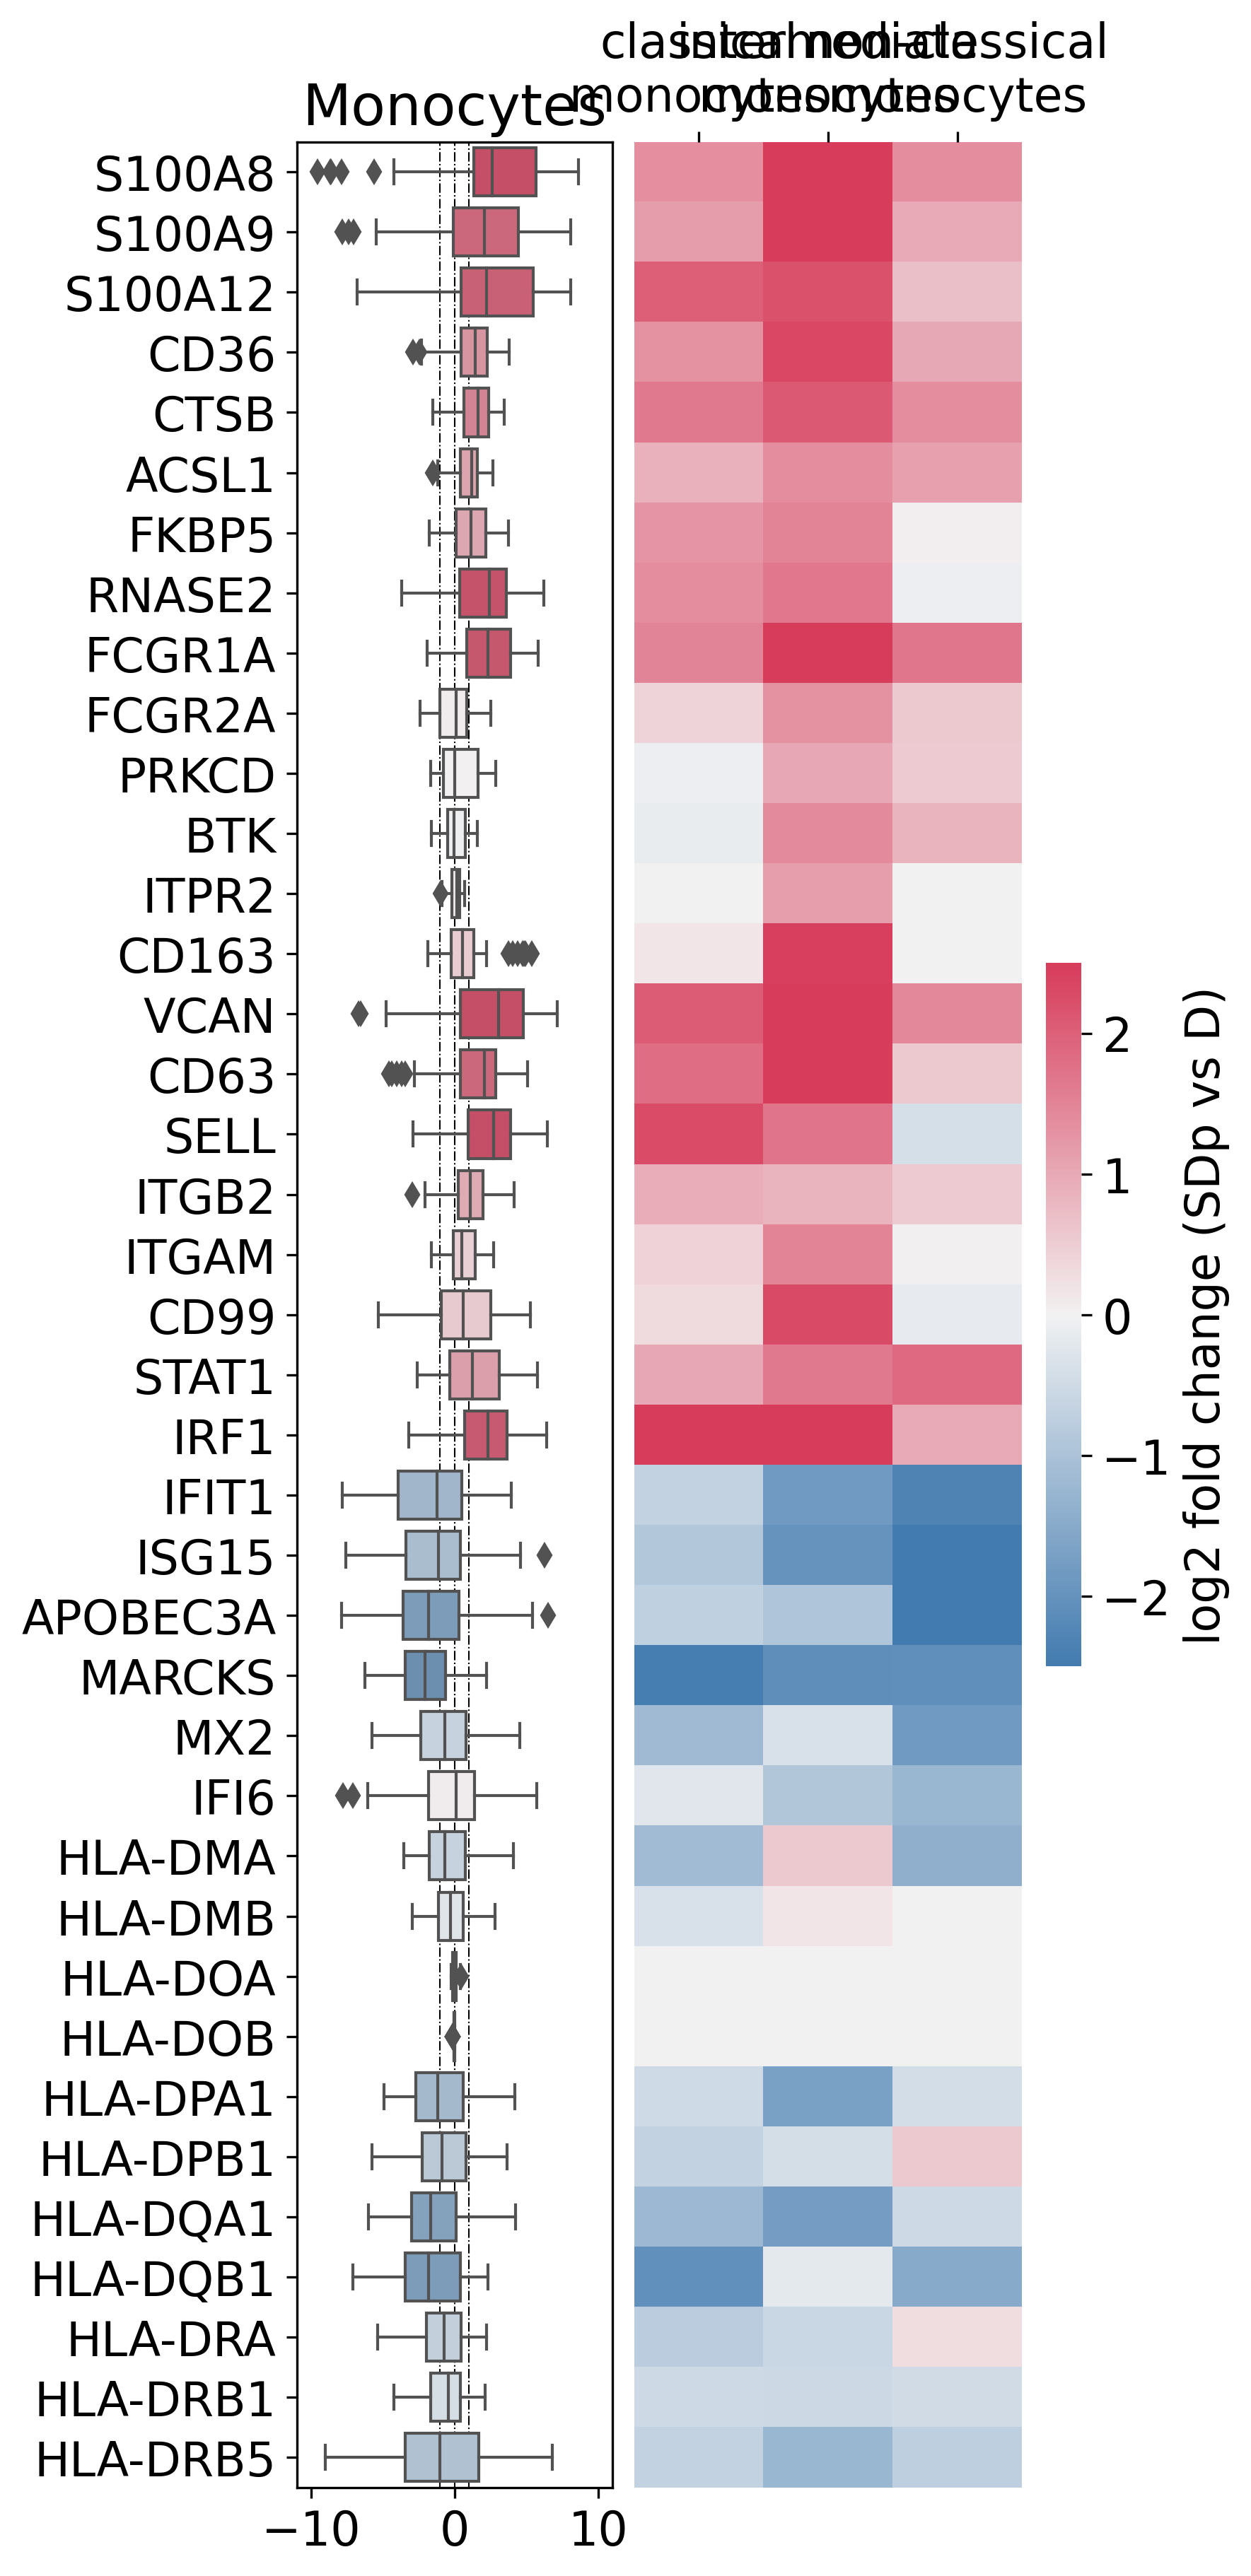

In [15]:
glist = [
    'S100A8', 'S100A9', 'S100A12', 'CD36', 'CTSB', 'ACSL1', 'FKBP5', 'RNASE2',# proinflammation
    'FCGR1A', 'FCGR2A', 'PRKCD', 'BTK', 'ITPR2', # Fc gamma receptor signaling
    'CD163', # scavenger receptor
    'VCAN', 'CD63', 'SELL', 'ITGB2', 'ITGAM', 'CD99', # cell adhesion and migration
    'STAT1', 'IRF1', 
    'IFIT1', 'ISG15', 'APOBEC3A', 'MARCKS', 'MX2', 'IFI6', #'RSAD2', 'IFIT3', 'MX1', # IFN response ISGs
    'HLA-DMA','HLA-DMB', 
    'HLA-DOA', 'HLA-DOB', 
    'HLA-DPA1', 'HLA-DPB1',
    'HLA-DQA1', 'HLA-DQB1',
    'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', 
#     'HLA-DPA1', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1', 'HLA-DRB5', # antigen presentation #'HLA-DMA','HLA-DMB', 'HLA-DPB1', 'HLA-DRA',    
]

csts = ['classical monocytes', 'intermediate monocytes', 'non-classical monocytes', ]
com_box_heatmap(ct_log2FC, cst_pair, 'Monocytes', csts, glist, path='DEGs_mono.pdf')

{'figure': <Figure size 1500x1455 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'Monocytes'}>, <AxesSubplot:>]}

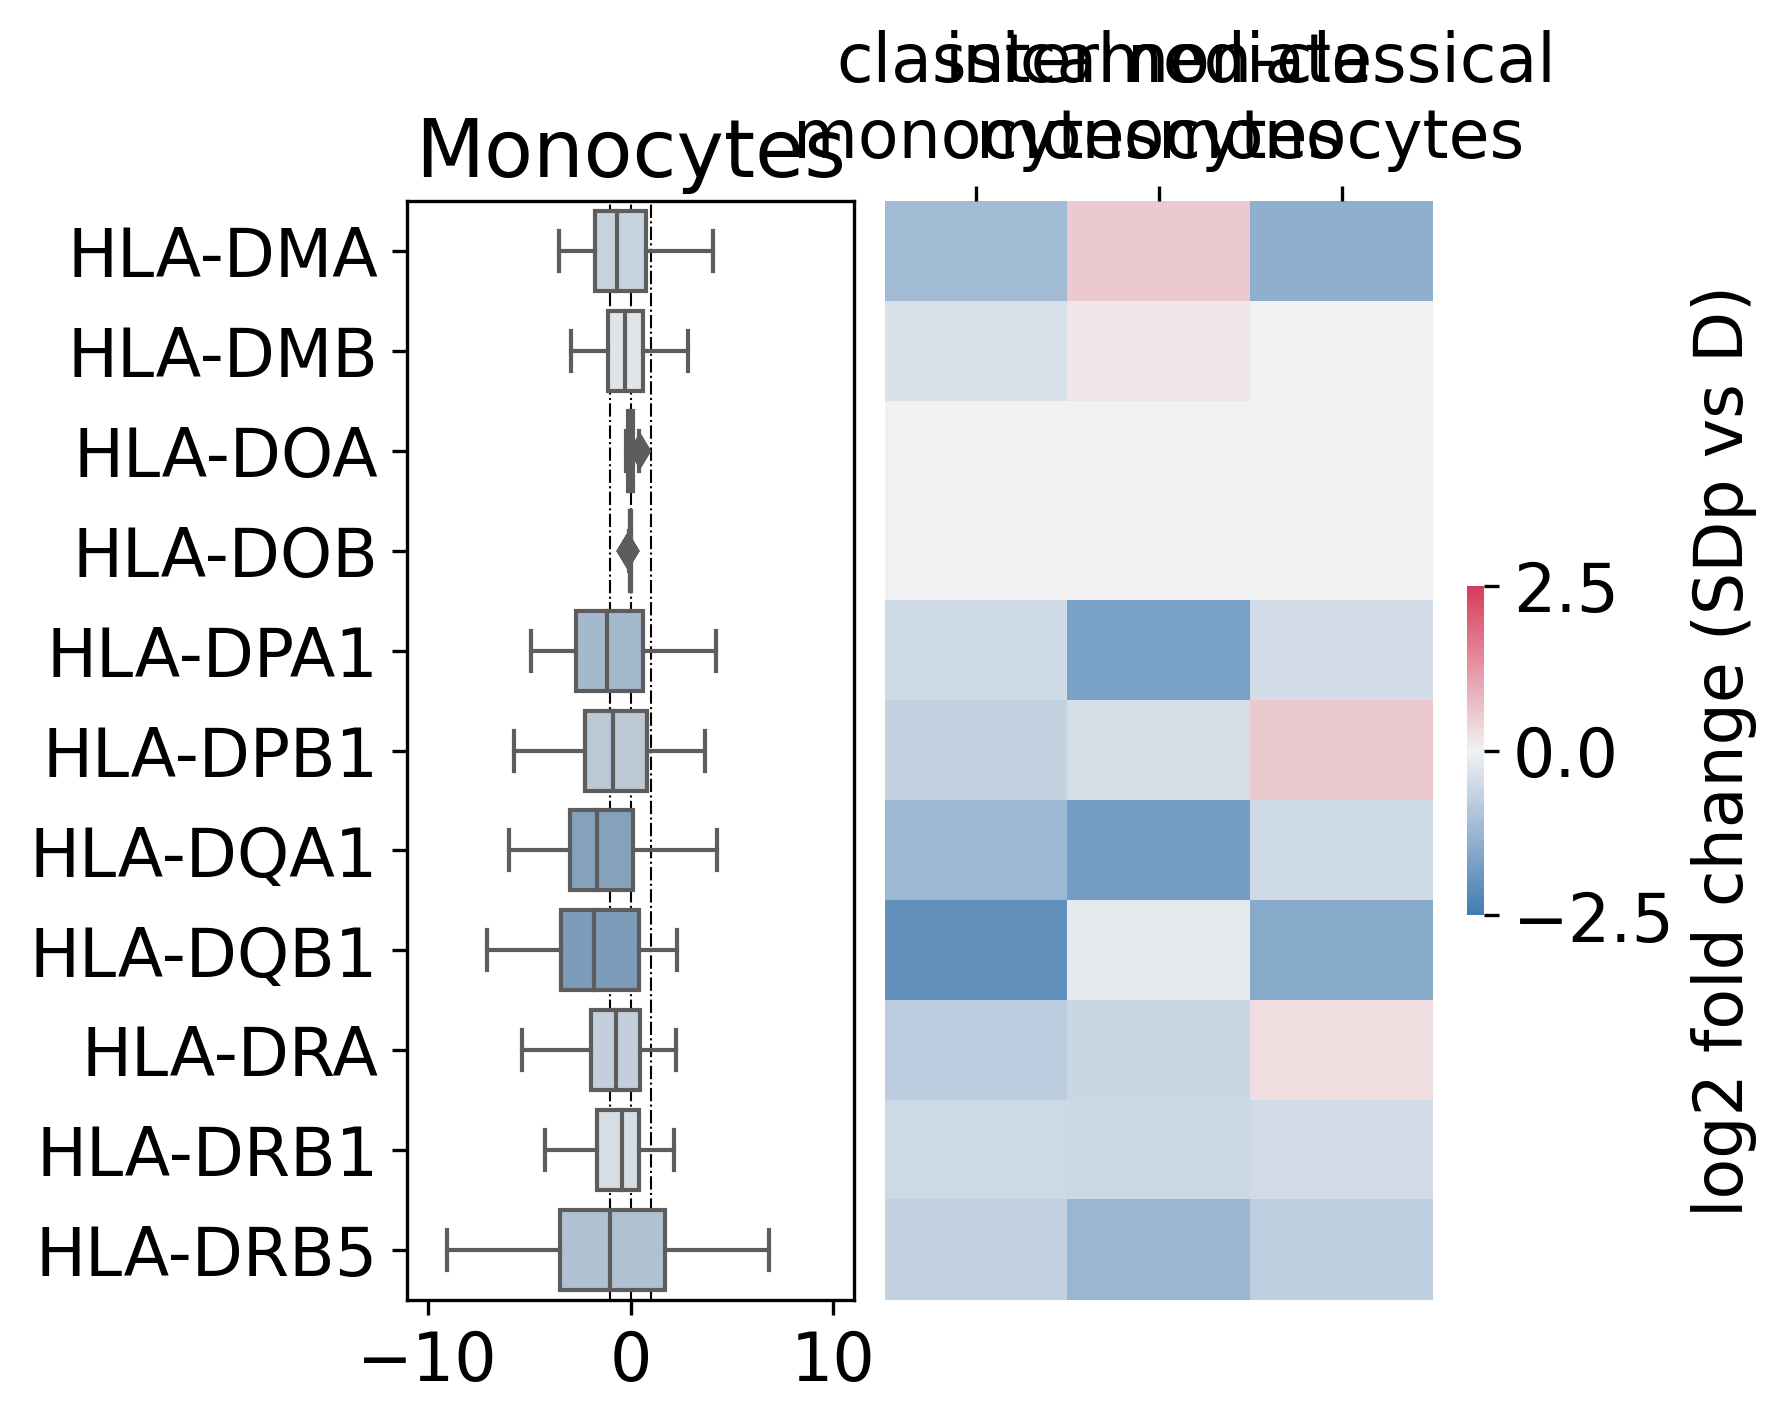

In [14]:
glist = [
#     'FCGR1A', 'FCGR2A', 'PRKCD', 'BTK', 'ITPR2', # Fc gamma receptor signaling
#     'CD163', # scavenger receptor
    'HLA-DMA','HLA-DMB', 
    'HLA-DOA', 'HLA-DOB', 
    'HLA-DPA1', 'HLA-DPB1',
    'HLA-DQA1', 'HLA-DQB1',
    'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', # antigen presentation
]
csts = ['classical monocytes', 'intermediate monocytes', 'non-classical monocytes', ]
com_box_heatmap(ct_log2FC, cst_pair, 'Monocytes', csts, glist, path='MHCII_mono.pdf')

# cDCs

{'figure': <Figure size 1200x3450 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'conventional DCs'}>, <AxesSubplot:>]}

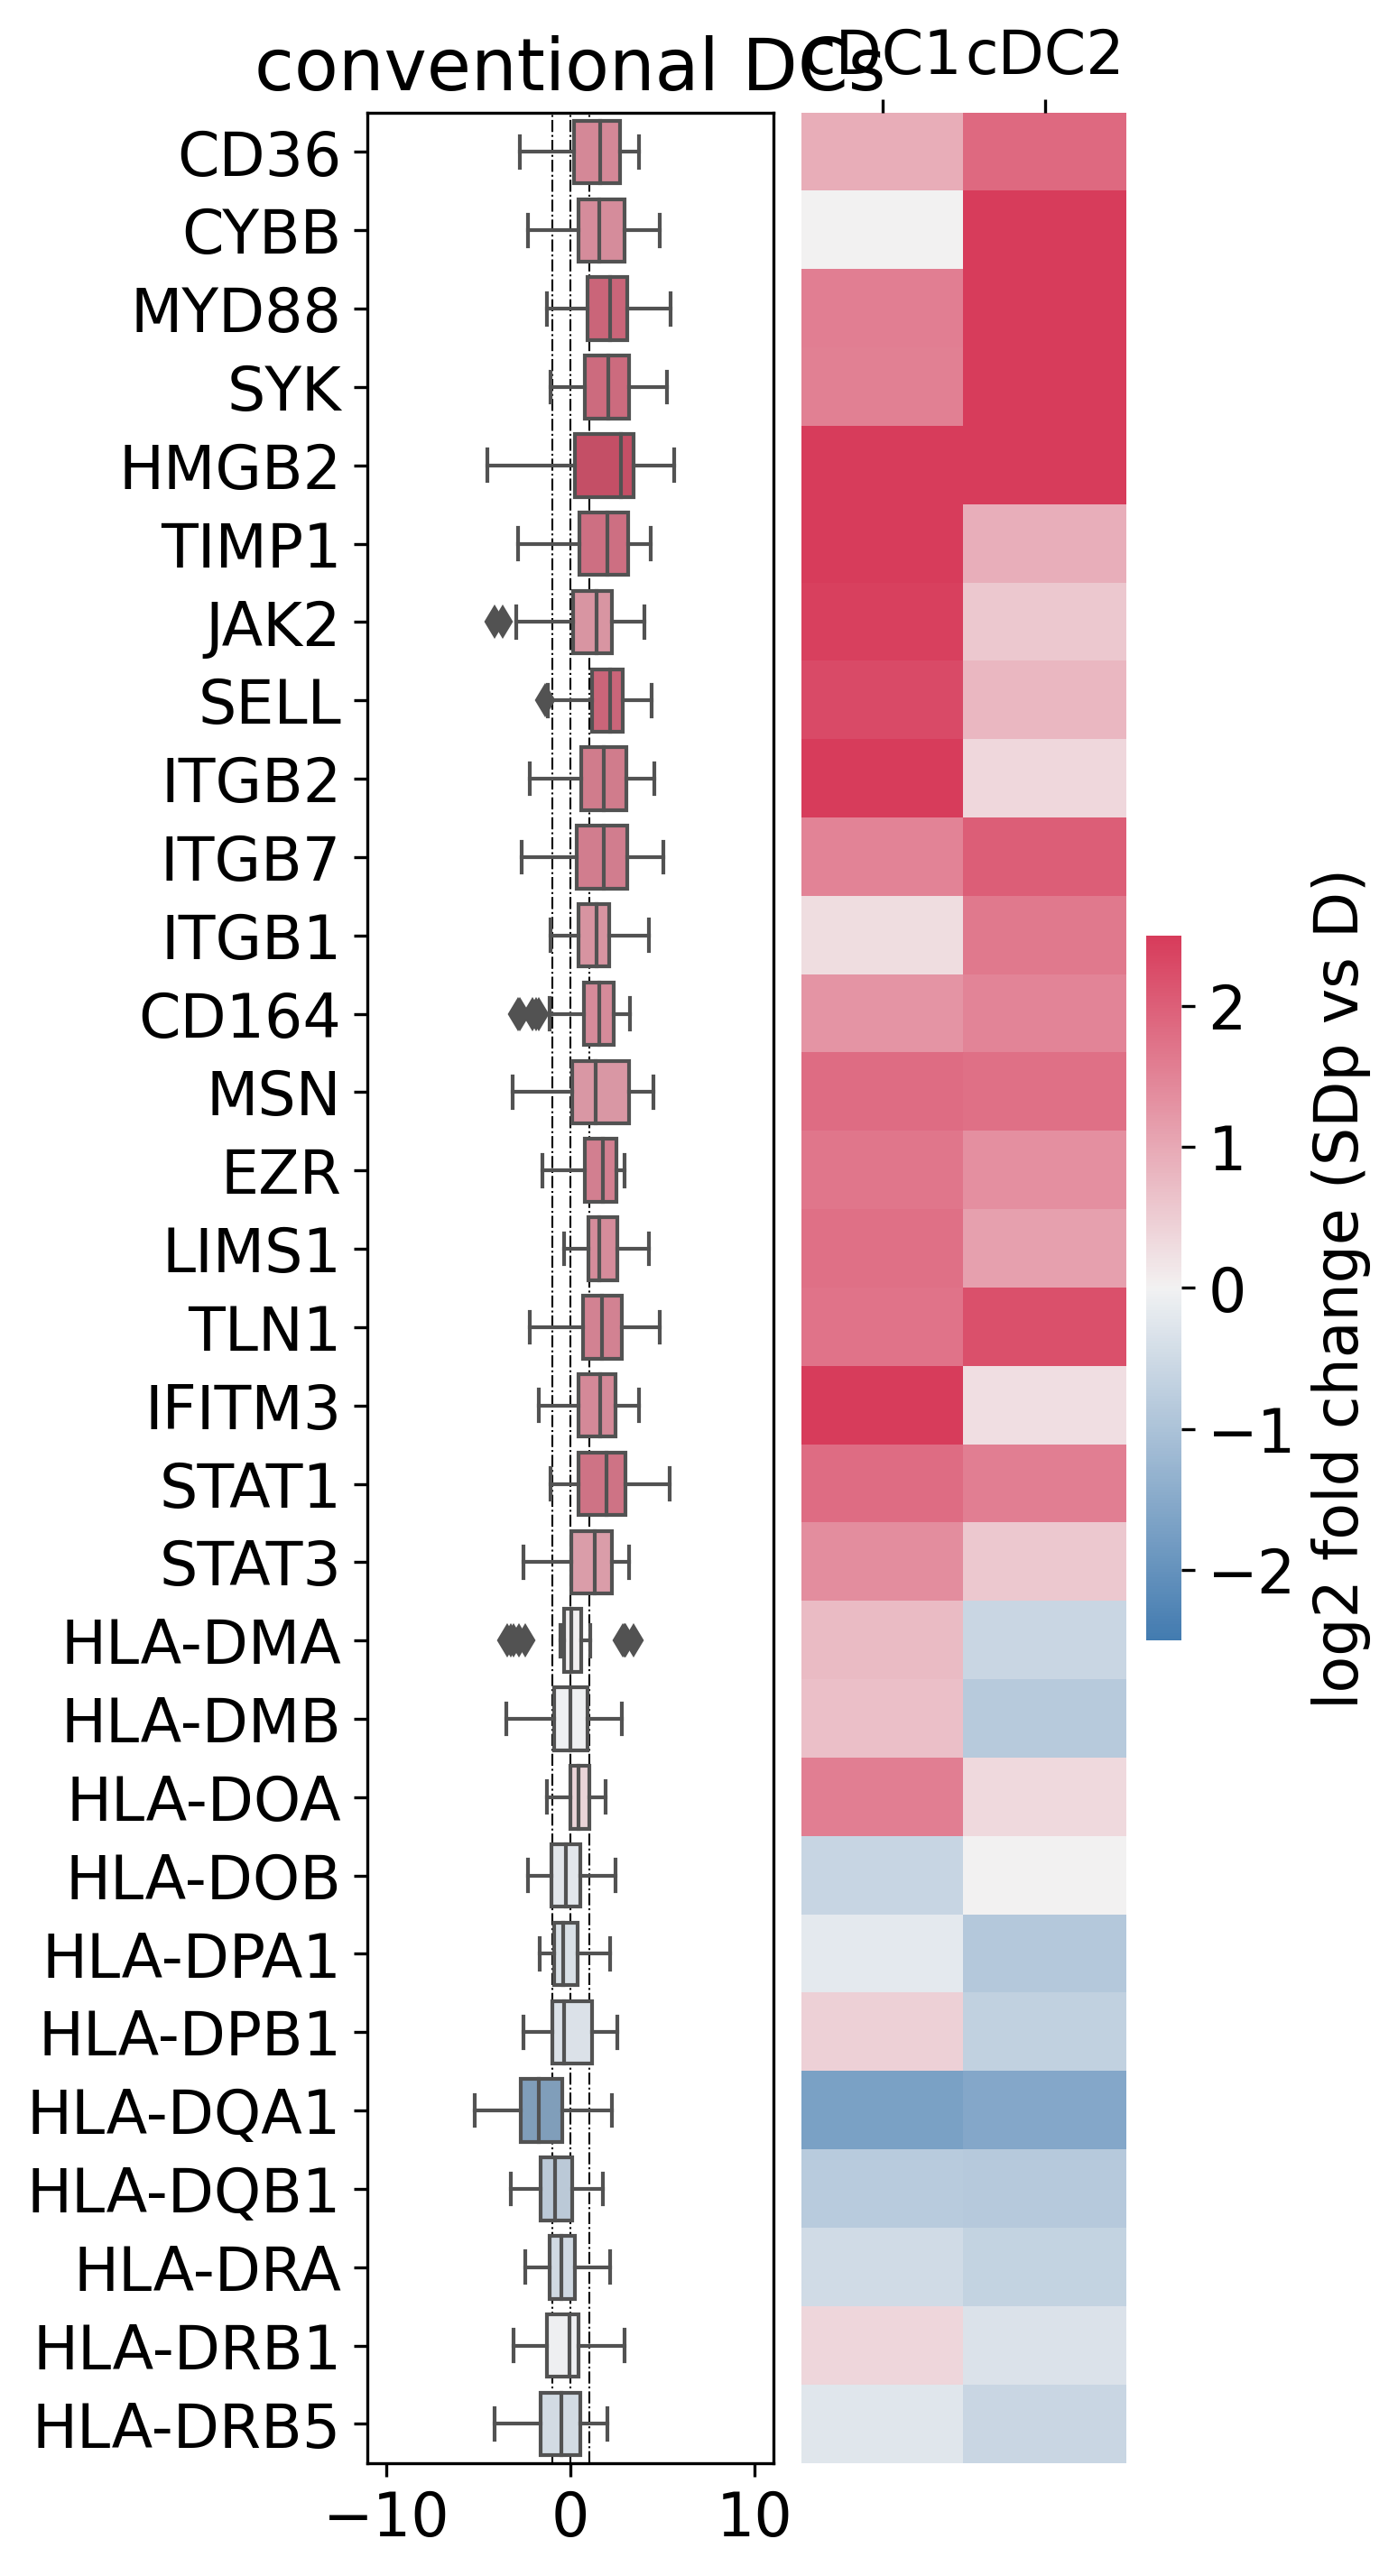

In [16]:
cDC_genes = ['CD36','CYBB','MYD88','SYK','HMGB2', 'TIMP1','JAK2', # 'inflammatory response'
    'SELL','ITGB2','ITGB7','ITGB1','CD164','MSN', 'EZR','LIMS1','TLN1', # leukocyte migration and adhesion
#     'CAT', 'TXNIP', 'TPP1', 'CYBB', 'MT2A', # stress response
    'IFITM3', 'STAT1', 'STAT3', # viral response
    'HLA-DMA','HLA-DMB', 
    'HLA-DOA', 'HLA-DOB', 
    'HLA-DPA1', 'HLA-DPB1',
    'HLA-DQA1', 'HLA-DQB1',
    'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', 
            ]

csts = ['cDC1', 'cDC2']
com_box_heatmap(ct_log2FC, cst_pair, 'conventional DCs', csts, cDC_genes, path='DEGs_cDCs.pdf')

{'figure': <Figure size 1800x1455 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'conventional DCs'}>, <AxesSubplot:>]}

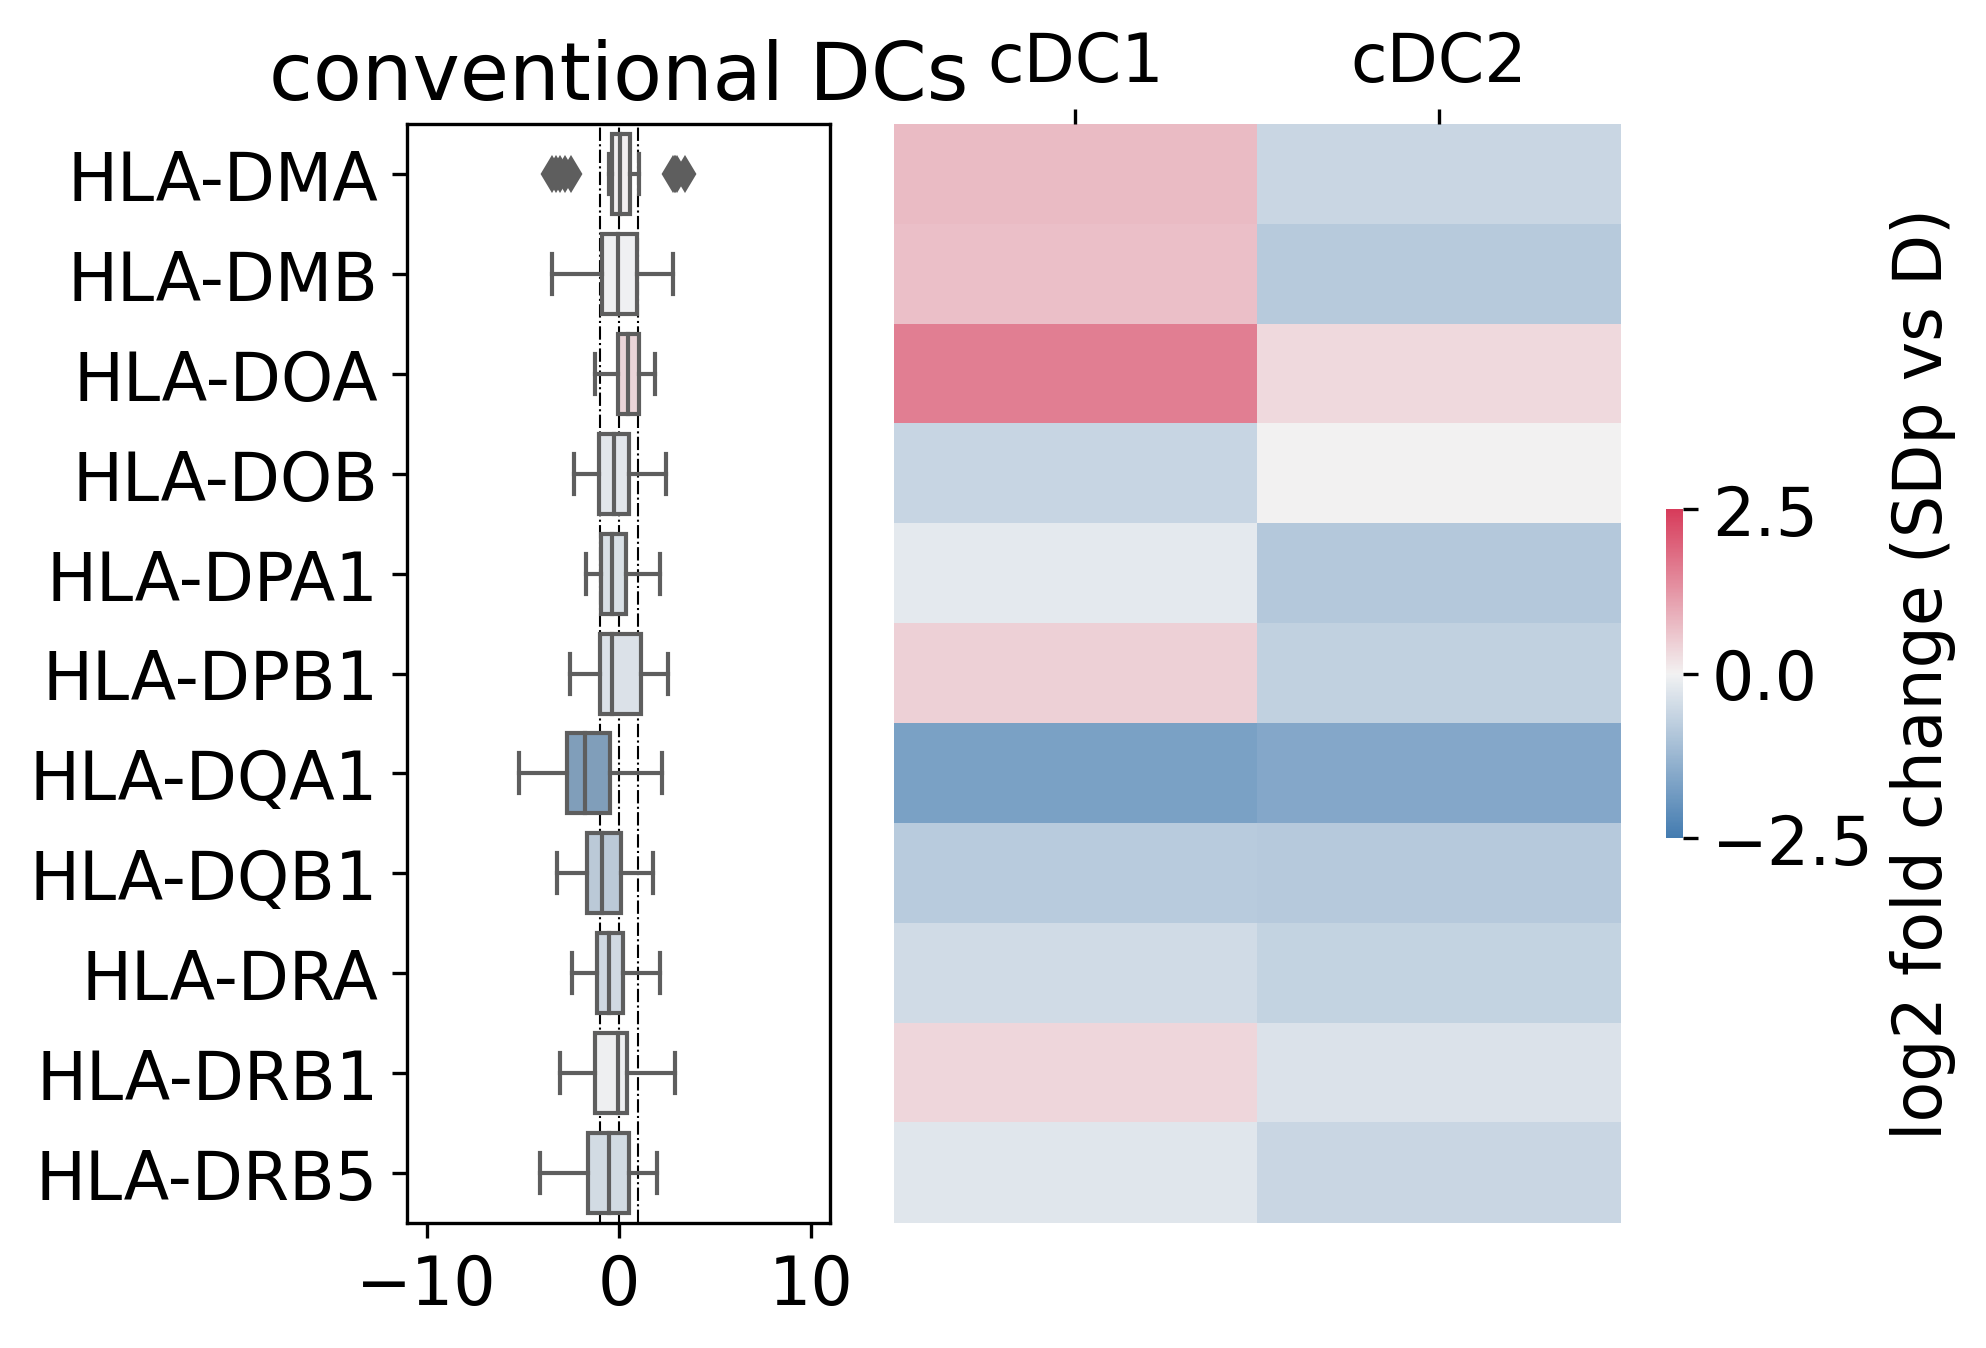

In [26]:
# HLA-DP, HLA-DM, HLA-DOA, HLA-DOB, HLA-DQ, and HLA-DR.

cDC_genes = [
    'HLA-DMA','HLA-DMB', 
    'HLA-DOA', 'HLA-DOB', 
    'HLA-DPA1', 'HLA-DPB1',
    'HLA-DQA1', 'HLA-DQB1',
    'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5' 
            ]

csts = ['cDC1', 'cDC2']
com_box_heatmap(ct_log2FC, cst_pair, 'conventional DCs', csts, cDC_genes, path='MHCII_cDCs.pdf')

# NK cells

{'figure': <Figure size 1200x2400 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'NK cells'}>, <AxesSubplot:>]}

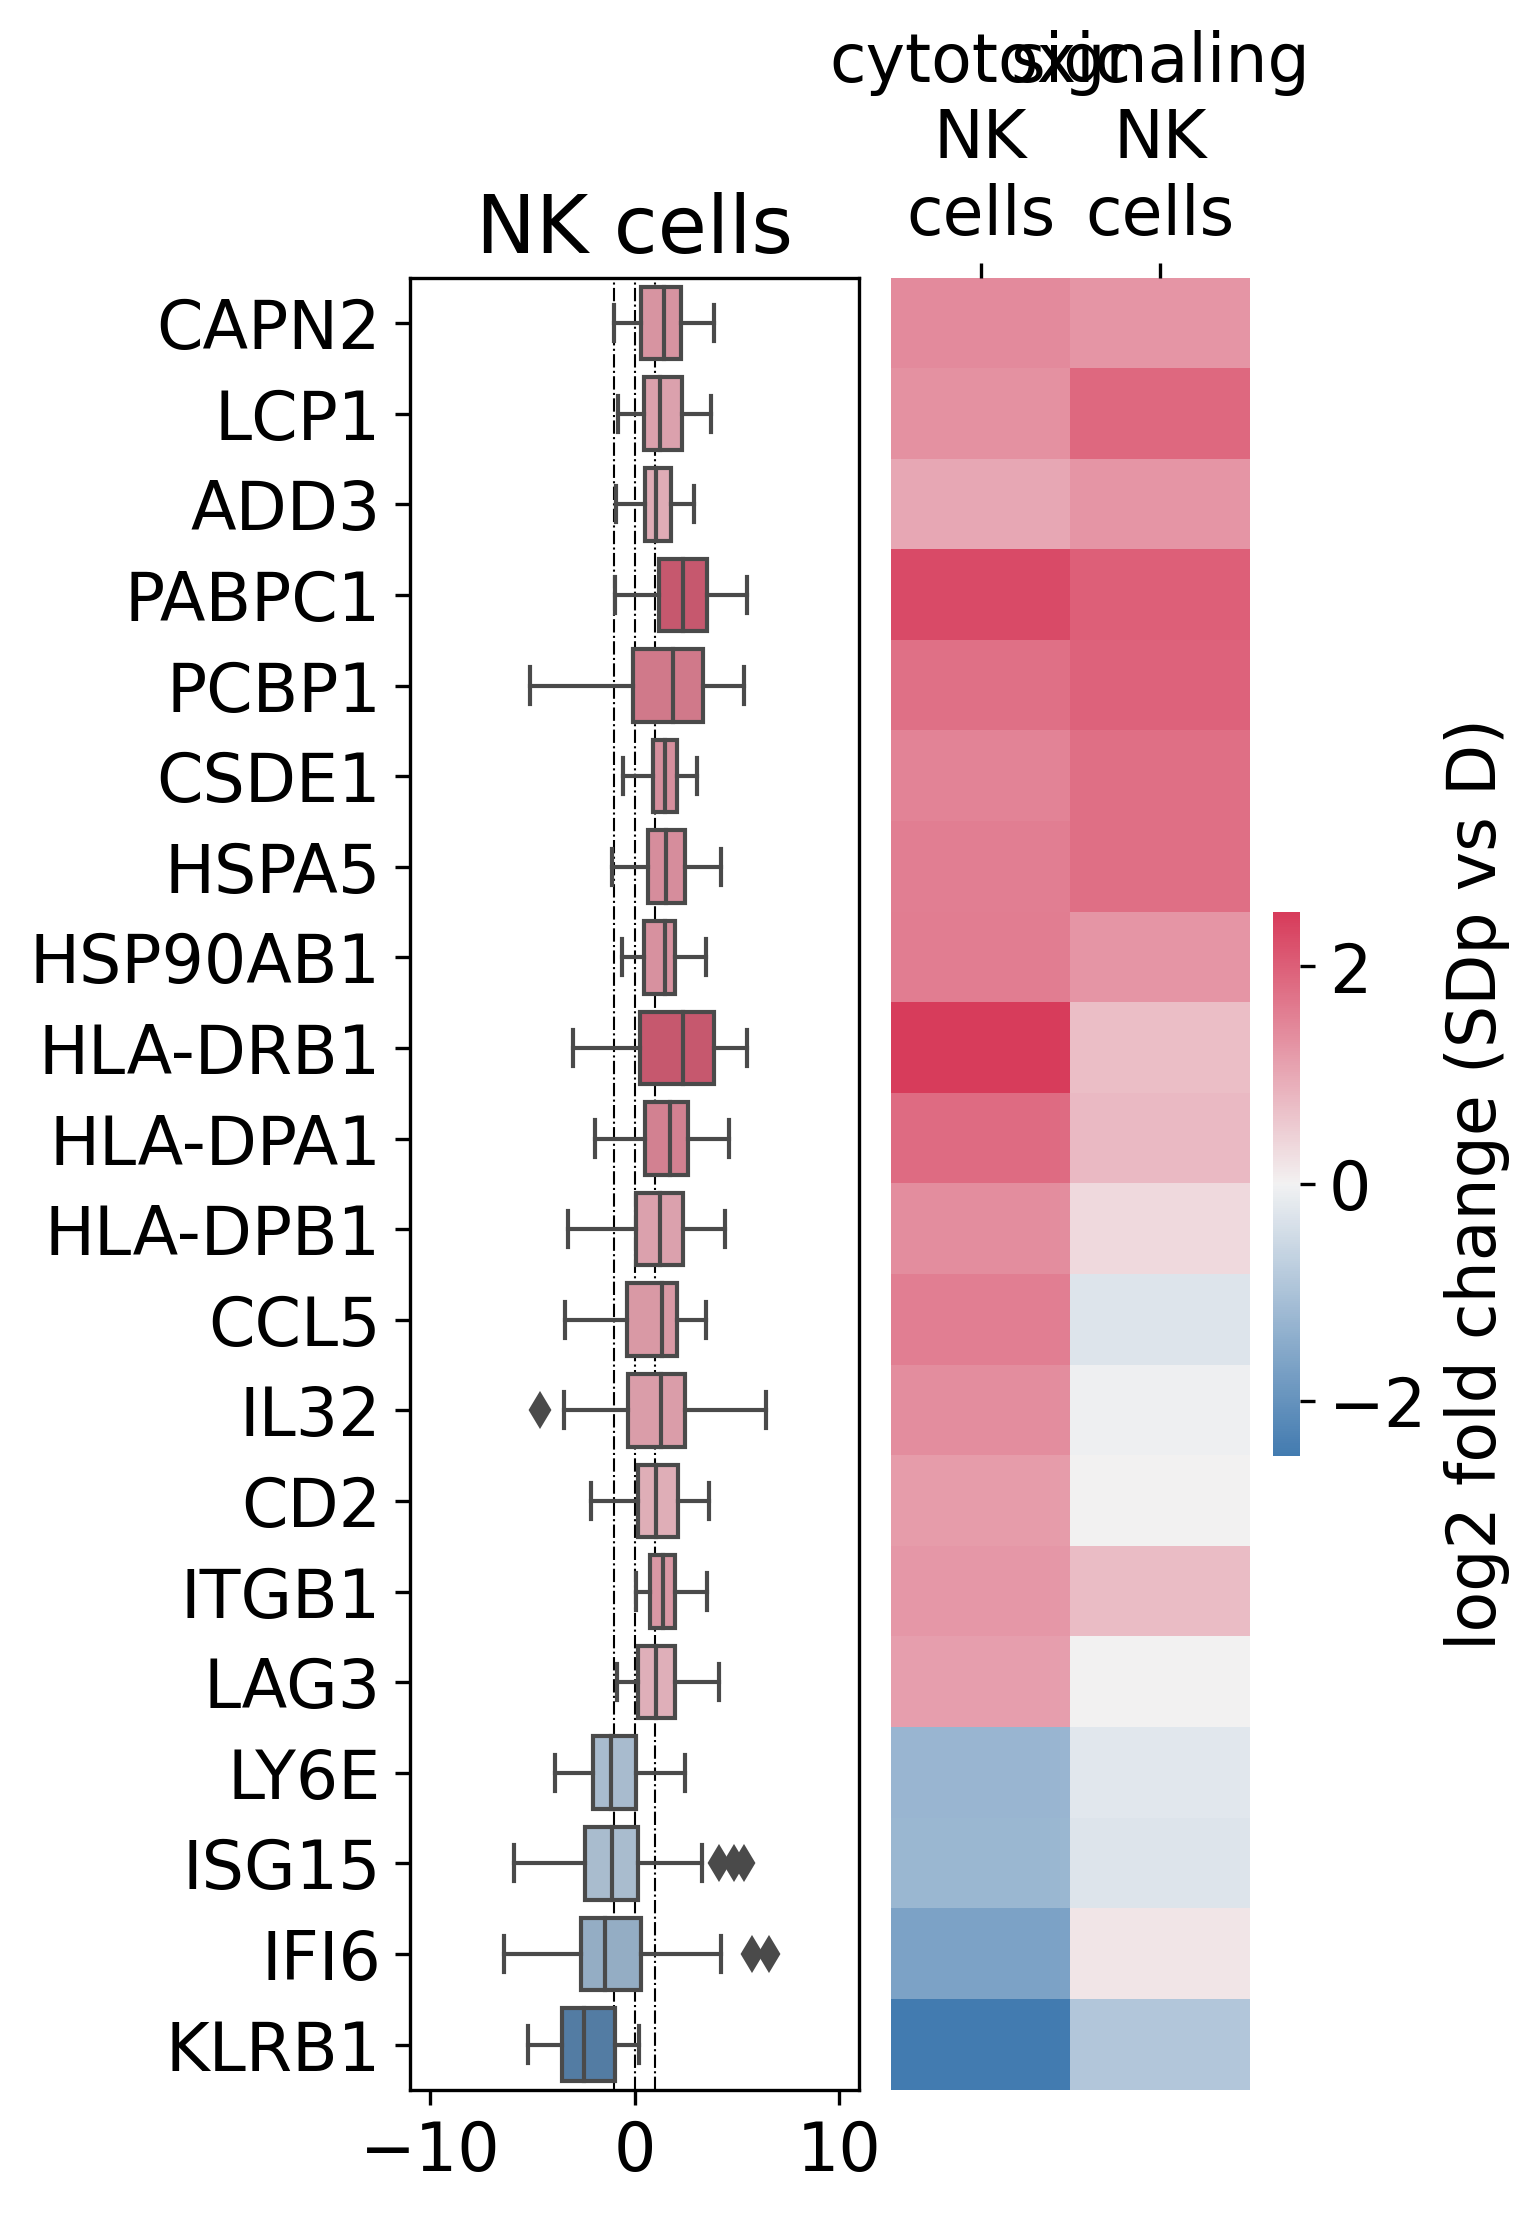

In [17]:
NK_genes = [
    'CAPN2','LCP1', 'ADD3', # cytoskeleton
    'PABPC1', 'PCBP1', 'CSDE1', 'HSPA5', 'HSP90AB1', # translation
    'HLA-DRB1', 'HLA-DPA1', 'HLA-DPB1',  'CCL5', 'IL32','CD2','ITGB1',  # NK activation
    'LAG3', # Exhaustion
    'LY6E', 'ISG15', 'IFI6', # ISGs
     #'XCL1', 'CCL4', # cytokines 
    'KLRB1', # Cytotoxic inhibition 
]

csts = ['cytotoxic NK cells', 'signaling NK cells']
com_box_heatmap(ct_log2FC, cst_pair, 'NK cells', csts, NK_genes, path='DEGs_NK.pdf')

{'figure': <Figure size 1200x1560 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'NK cells'}>, <AxesSubplot:>]}

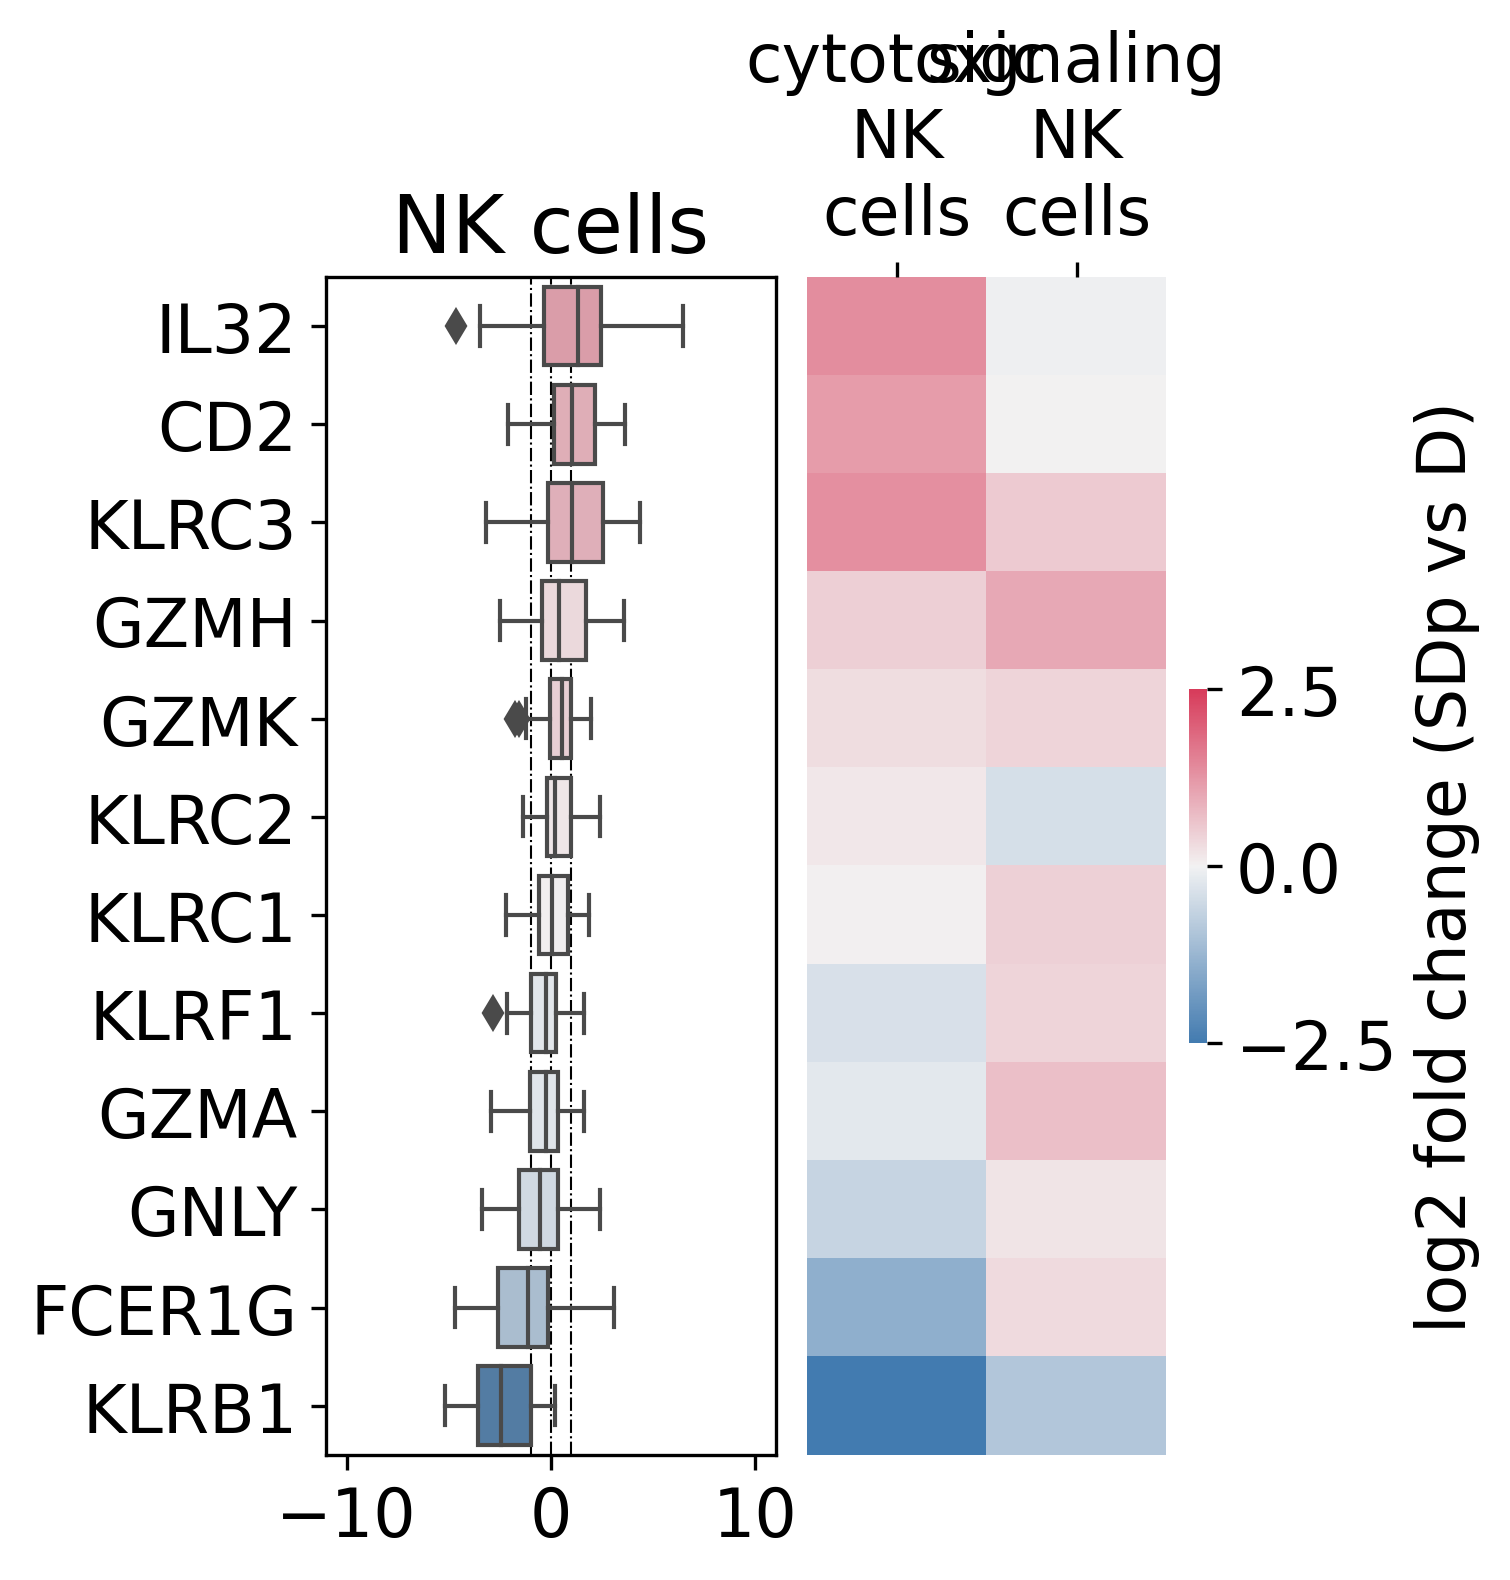

In [18]:
adap_NK_genes = ['IL32', 'CD2','KLRC3', 'GZMH', 'GZMK', 'KLRC2', 'KLRC1', # upregulation in adaptive NK cells
    'KLRF1', 'GZMA','GNLY', 'FCER1G', 'KLRB1', # downregulation in adaptive NK cells
    ]

csts = ['cytotoxic NK cells', 'signaling NK cells']
com_box_heatmap(ct_log2FC, cst_pair, 'NK cells', csts, adap_NK_genes, path='adapt_NK.pdf')

# T cells

{'figure': <Figure size 2700x2085 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'T cells'}>, <AxesSubplot:>]}

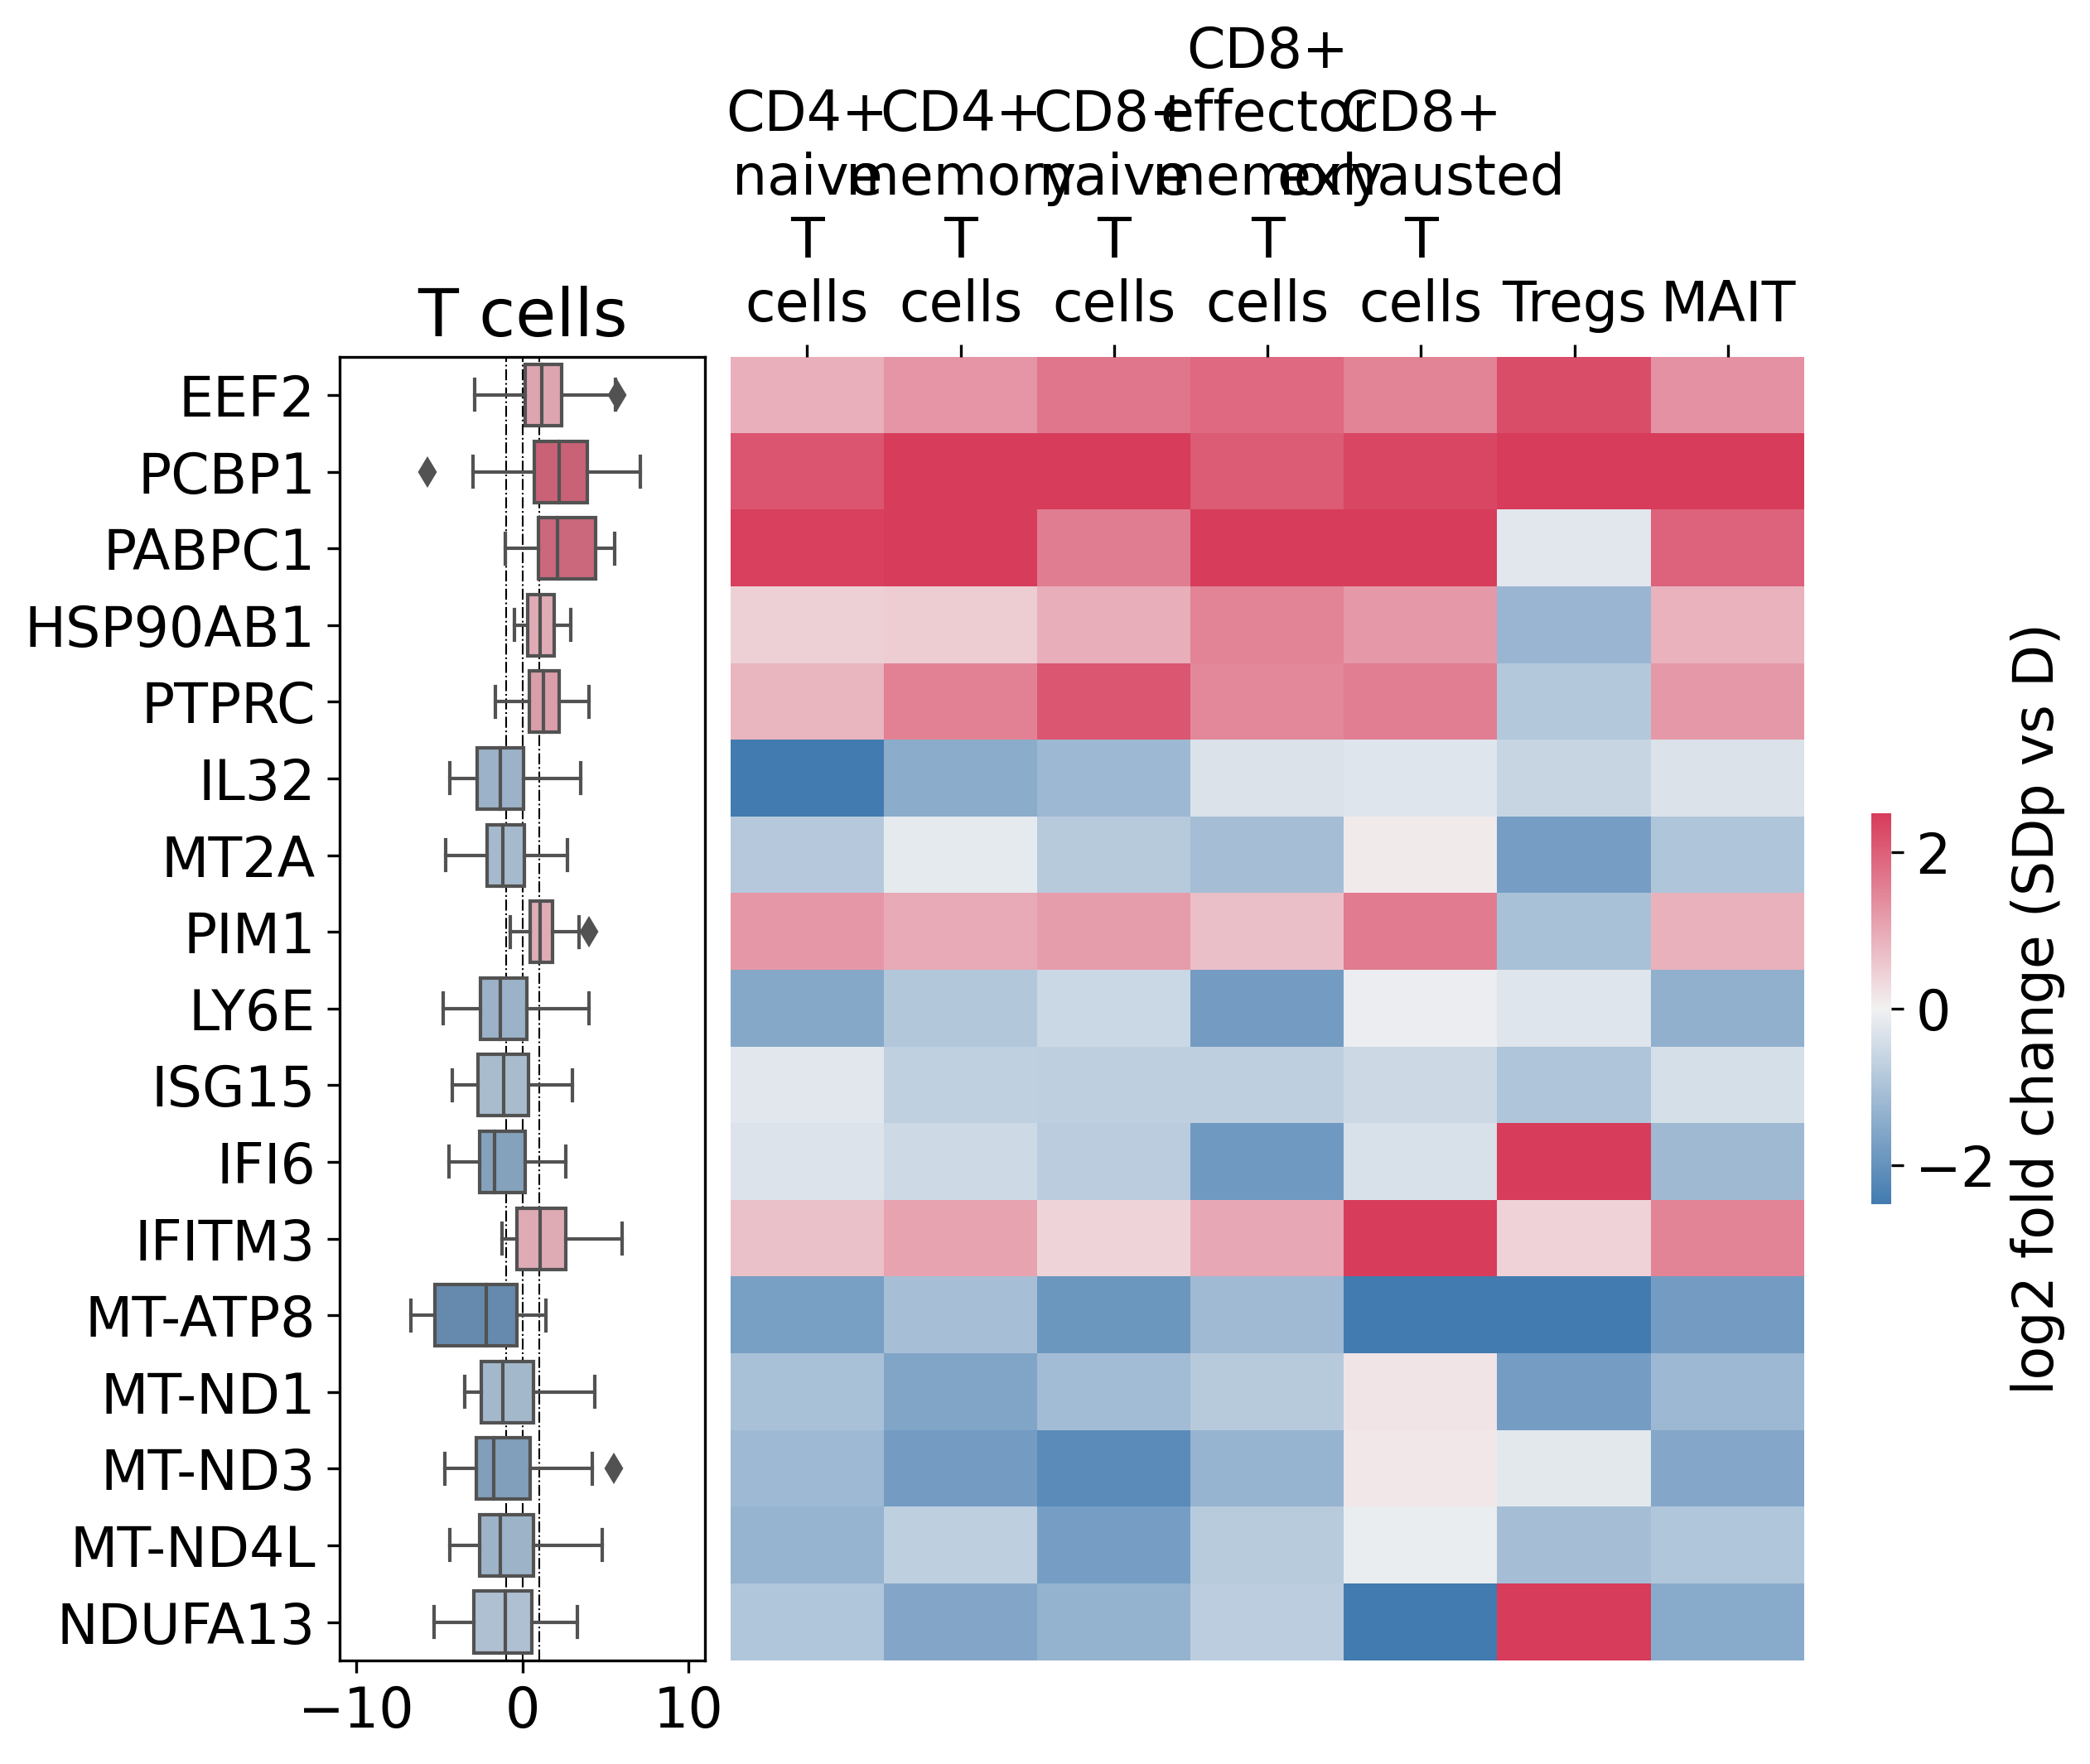

In [19]:
T_genes = [
    'EEF2', 'PCBP1', 'PABPC1', 'HSP90AB1', # translation
    'PTPRC', 'IL32',# T cell activation
    'MT2A','PIM1', # T cell survival
    'LY6E', 'ISG15','IFI6','IFITM3',  # ISGs
    'MT-ATP8','MT-ND1','MT-ND3','MT-ND4L','NDUFA13', # ATP biosynthesis
#     'CTLA4', 'LAG3', 'TIGIT', 'HAVCR2', 'PDCD1', #'FOXP3',
]

csts = ['CD4+ naive T cells', 'CD4+ memory T cells', 'CD8+ naive T cells', 
        'CD8+ effector memory T cells', 'CD8+ exhausted T cells', 'Tregs', 'MAIT']
com_box_heatmap(ct_log2FC, cst_pair, 'T cells', csts, T_genes, path='DEGs_T.pdf')

{'figure': <Figure size 2700x825 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'T cells'}>, <AxesSubplot:>]}

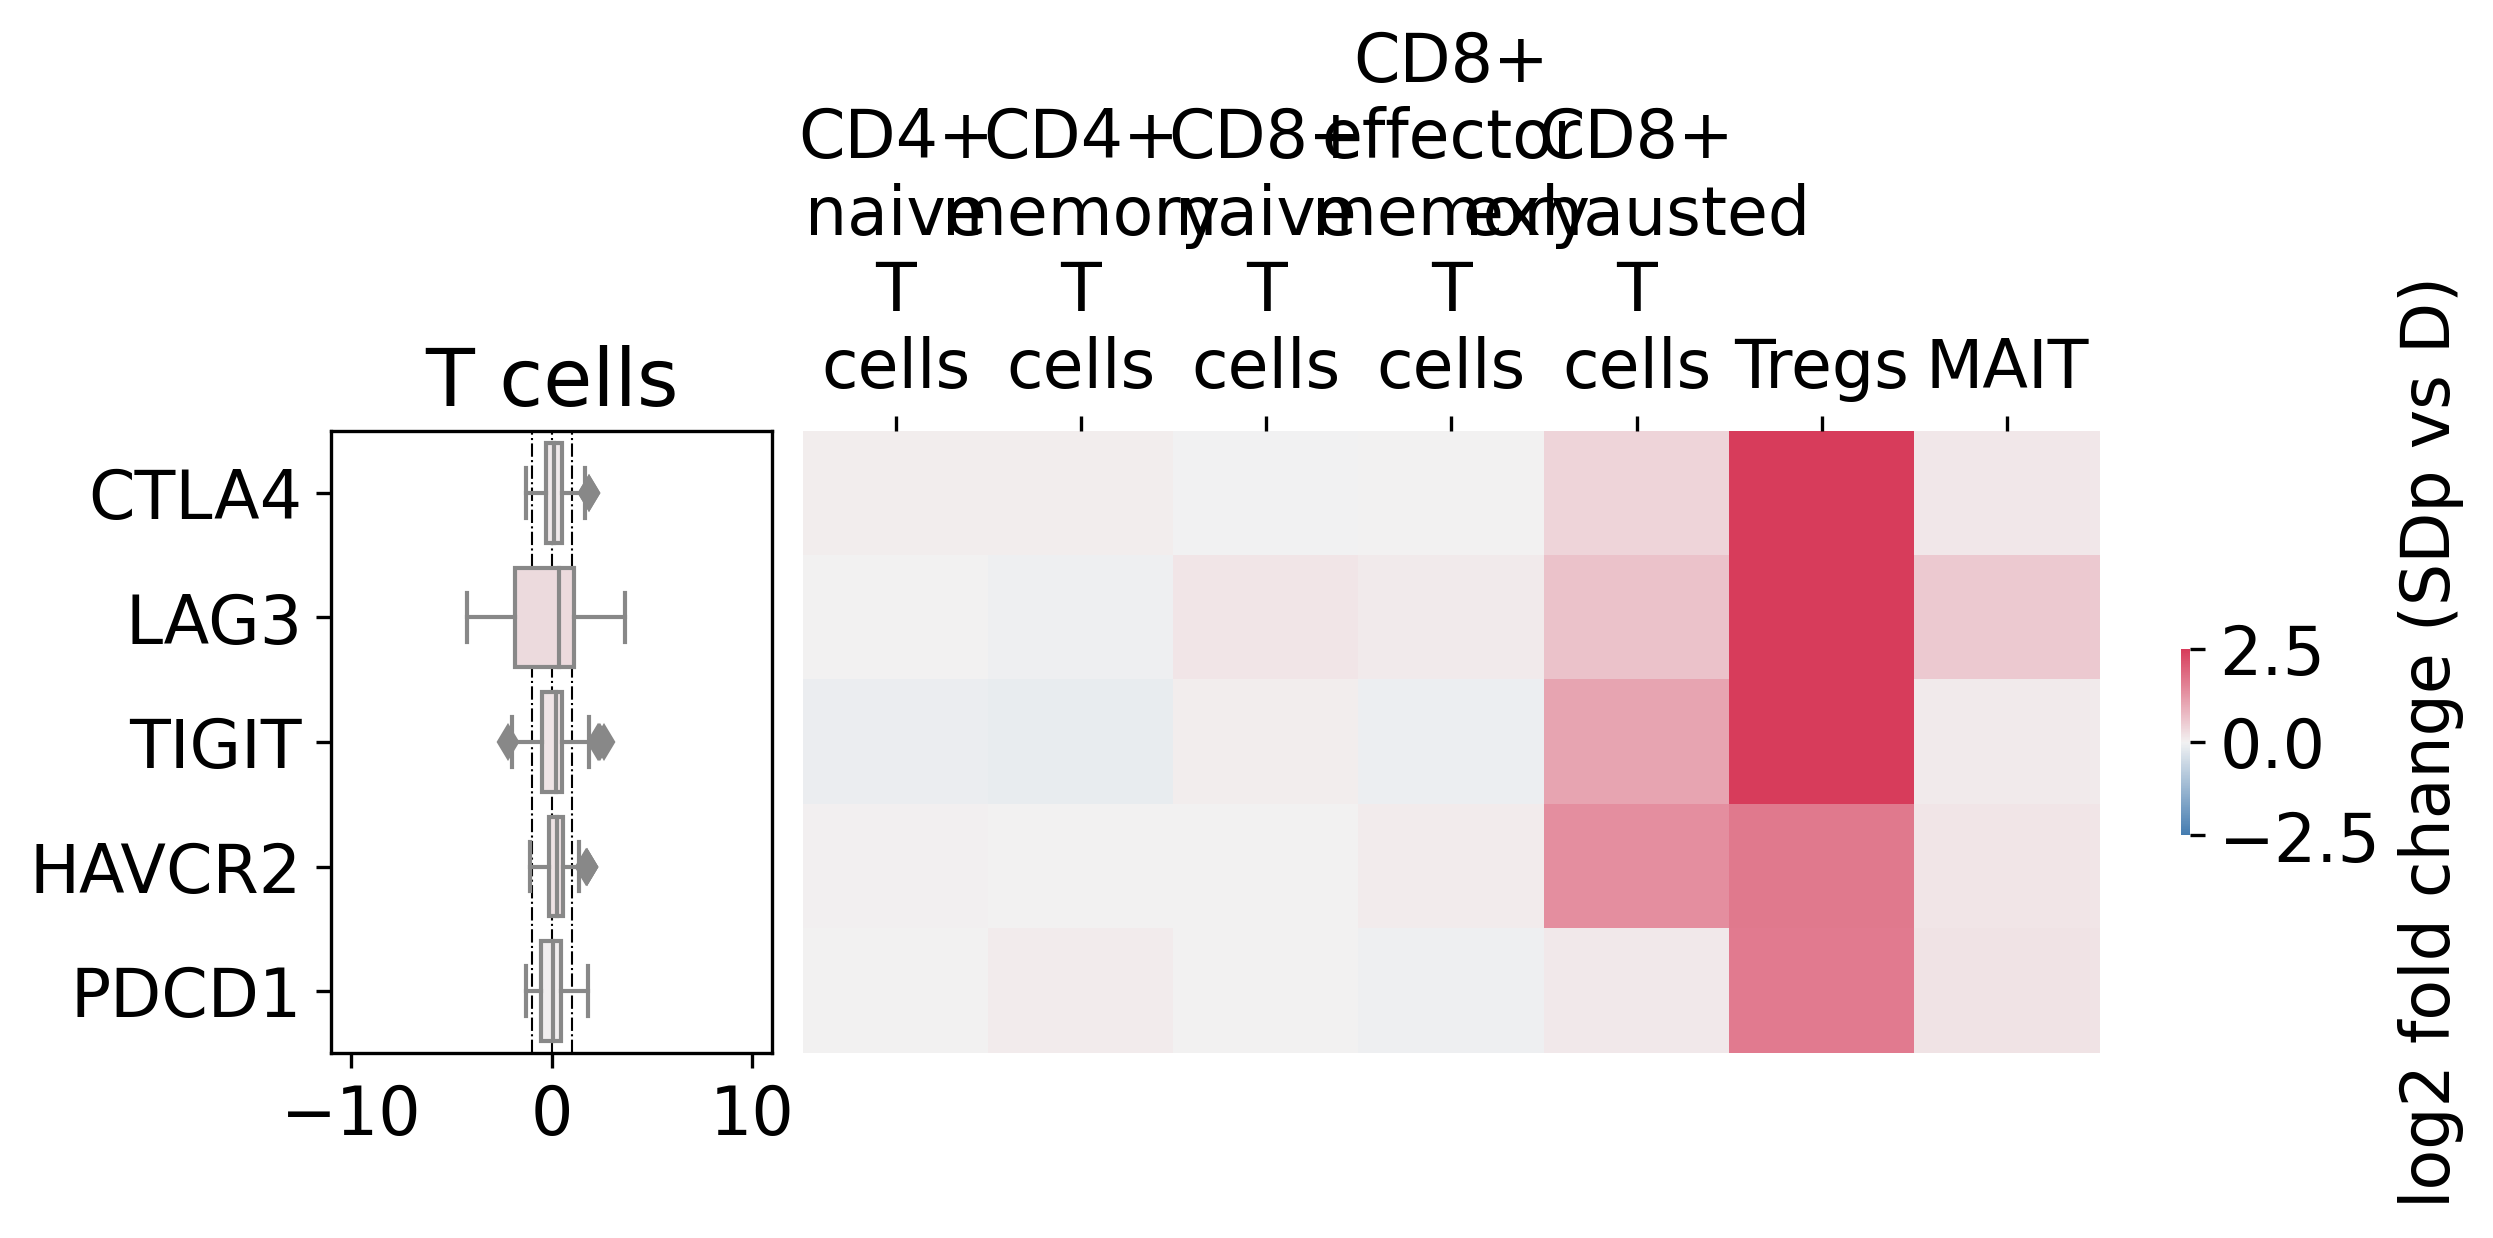

In [20]:
exh_T_genes = ['CTLA4', 'LAG3', 'TIGIT', 'HAVCR2', 'PDCD1', ] #'FOXP3'

csts = ['CD4+ naive T cells', 'CD4+ memory T cells', 'CD8+ naive T cells', 
        'CD8+ effector memory T cells', 'CD8+ exhausted T cells', 'Tregs', 'MAIT']
com_box_heatmap(ct_log2FC, cst_pair, 'T cells', csts, exh_T_genes, path='exhau_T.pdf')

{'figure': <Figure size 1200x2715 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'Plasmablasts'}>, <AxesSubplot:>]}

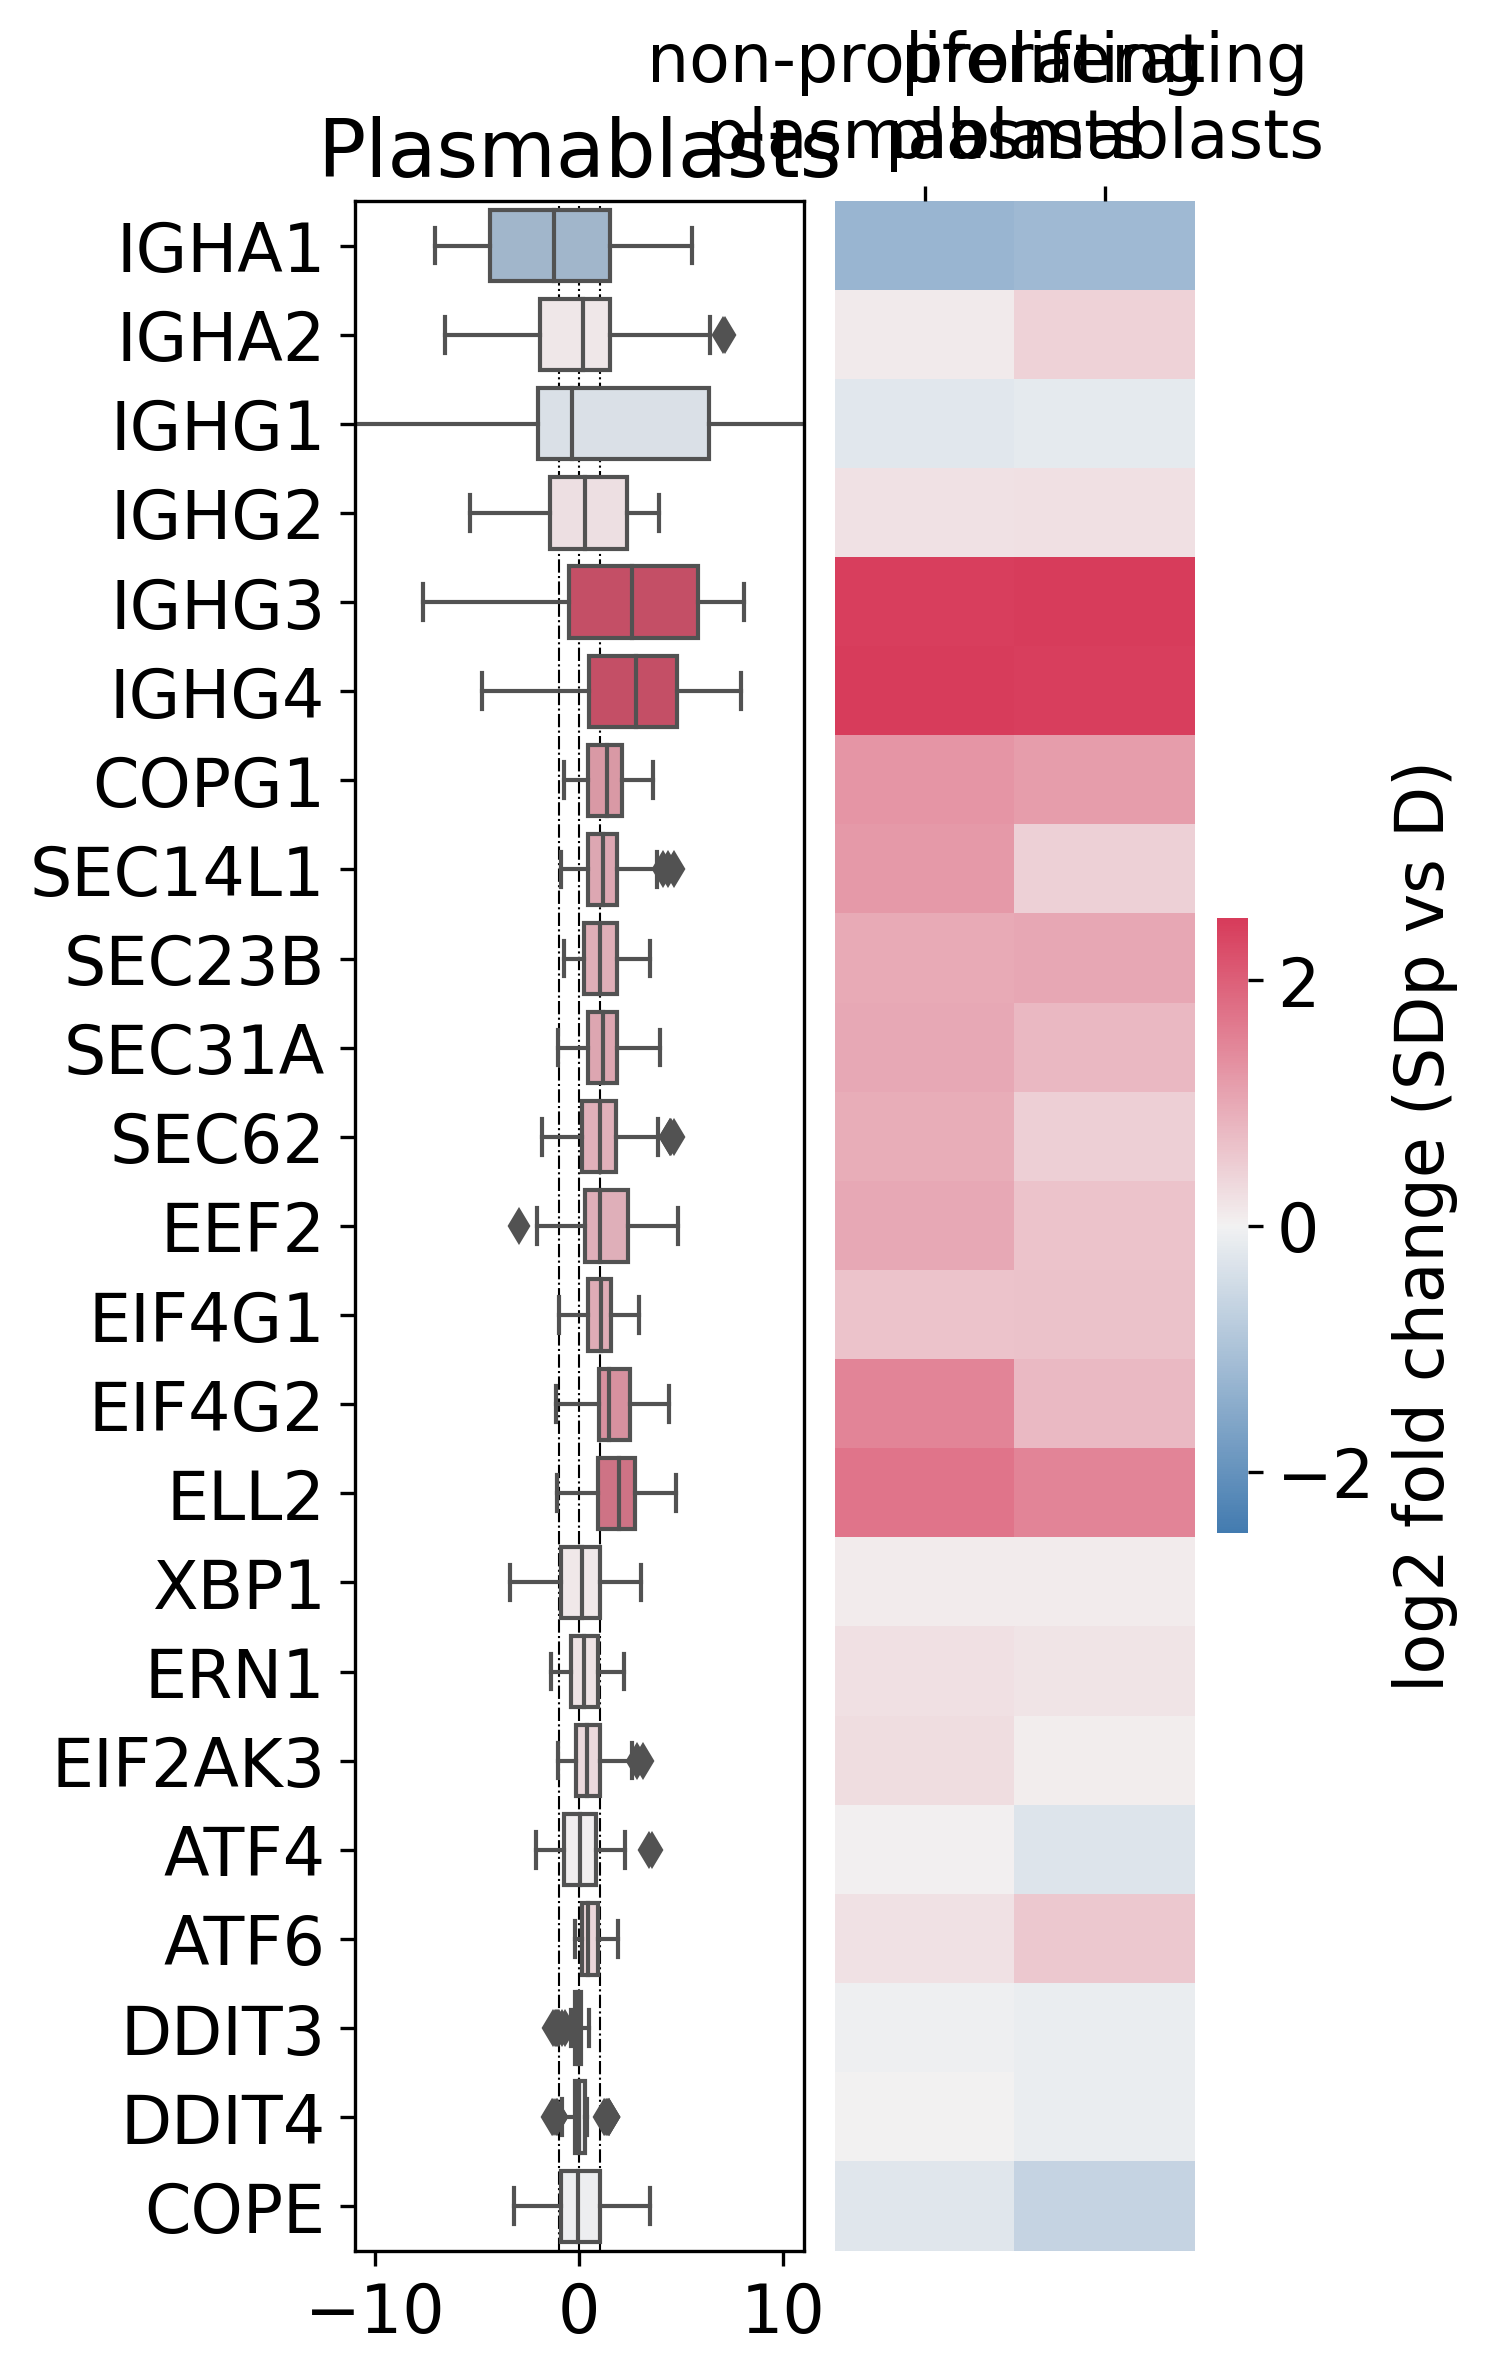

In [24]:
PB_genes = ['IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 
            'COPG1', 'SEC14L1', 'SEC23B', 'SEC31A', 'SEC62', 'EEF2', 'EIF4G1', 'EIF4G2', 'ELL2', 
            'XBP1', 'ERN1', 'EIF2AK3', 'ATF4', 'ATF6', 'DDIT3', 'DDIT4', 'COPE'
           ]

csts = ['non-proliferating plasmablasts', 'proliferating plasmablasts']
com_box_heatmap(ct_log2FC, cst_pair, 'Plasmablasts', csts, PB_genes, path='PB.pdf')

# B cells

{'figure': <Figure size 1500x3135 with 3 Axes>,
 'ax': [<AxesSubplot:title={'center':'B cells'}>, <AxesSubplot:>]}

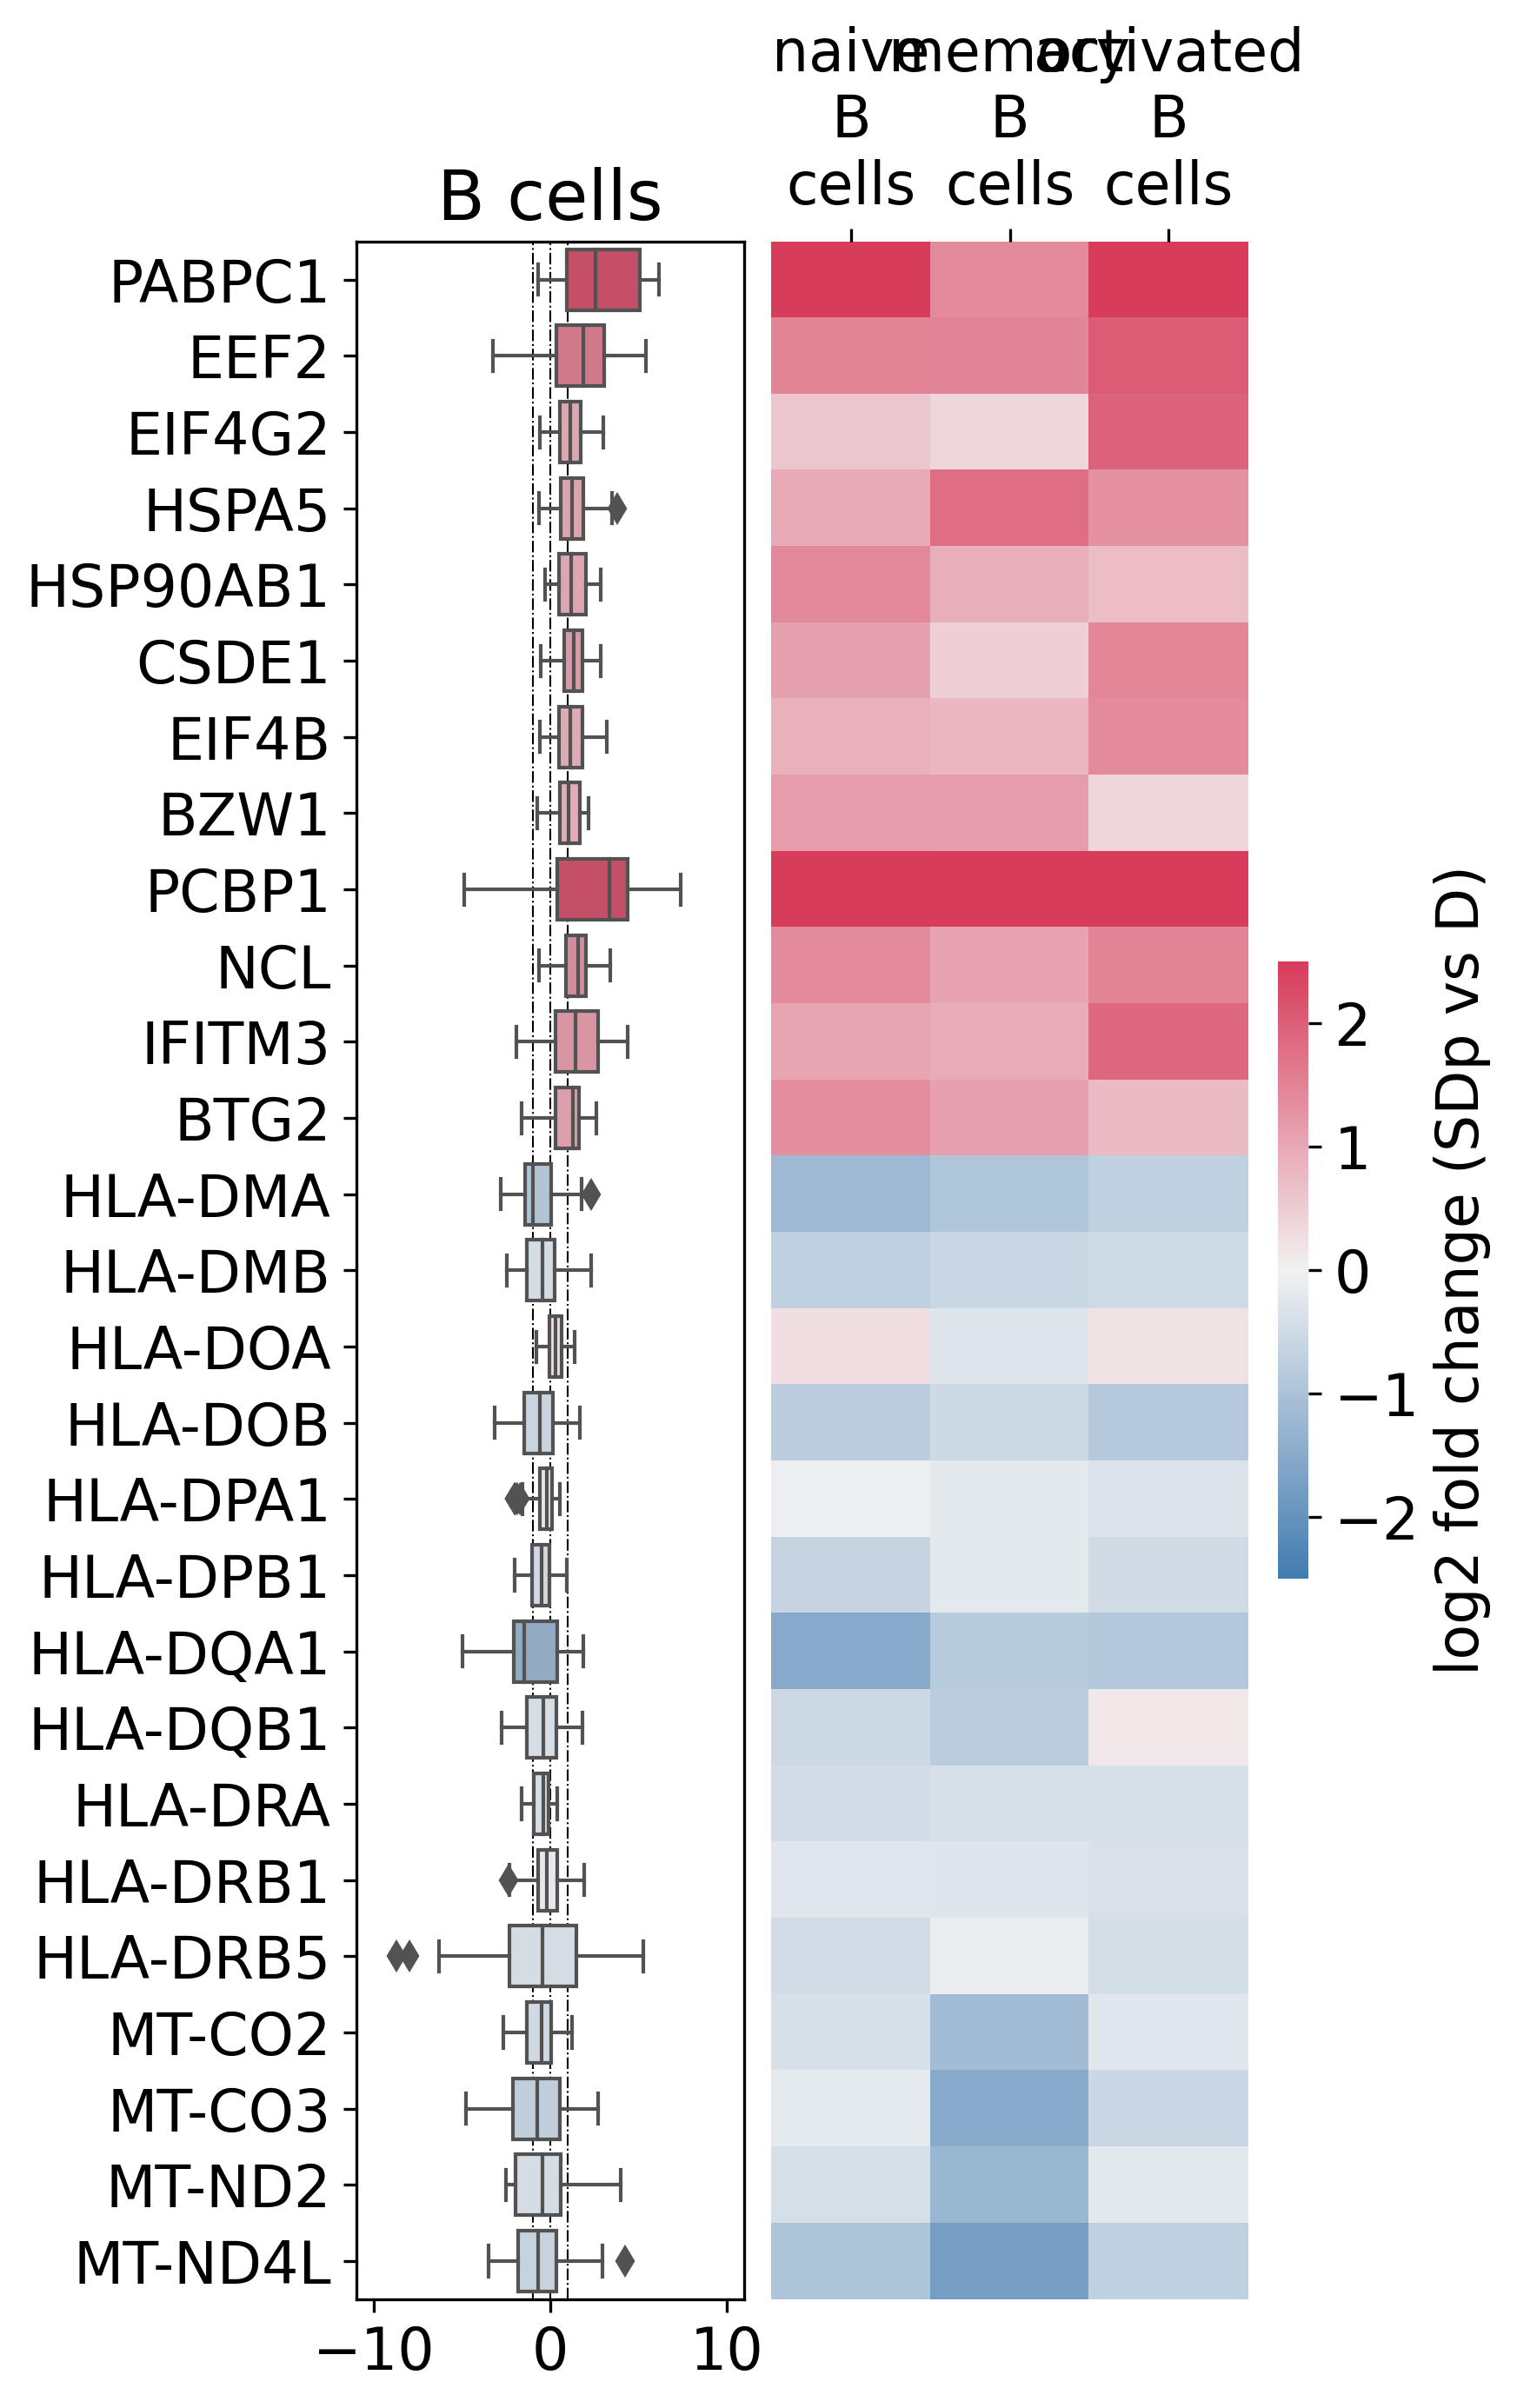

In [19]:
B_genes = [
    'PABPC1', 'EEF2','EIF4G2','HSPA5', 'HSP90AB1','CSDE1',
    'EIF4B','BZW1', 'PCBP1', 'NCL',
    'IFITM3',
    'BTG2',
#     'HLA-DPA1', 'HLA-DQA1', 'HLA-DQB1','HLA-DRB5', 'HLA-DMA', 
    'HLA-DMA','HLA-DMB', 
    'HLA-DOA', 'HLA-DOB', 
    'HLA-DPA1', 'HLA-DPB1',
    'HLA-DQA1', 'HLA-DQB1',
    'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5',
    'MT-CO2','MT-CO3','MT-ND2','MT-ND4L'
]

csts = ['naive B cells', 'memory B cells', 'activated B cells']
com_box_heatmap(ct_log2FC, cst_pair, 'B cells', csts, B_genes, path='DEGs_B2.pdf')

In [14]:
import time

In [15]:
time.time()

1666926905.8632967

In [17]:
time.time()

1666926951.2300196

In [16]:
time.ctime()

'Fri Oct 28 14:15:14 2022'

In [20]:
time.struct_time(tm_year=2018, tm_mon=12, tm_mday=27, 
                    tm_hour=6, tm_min=35, tm_sec=17, 
                    tm_wday=3, tm_yday=361, tm_isdst=0)

TypeError: structseq() takes at most 2 keyword arguments (9 given)

In [21]:
time.gmtime()

time.struct_time(tm_year=2022, tm_mon=10, tm_mday=28, tm_hour=3, tm_min=31, tm_sec=24, tm_wday=4, tm_yday=301, tm_isdst=0)

In [22]:
time.asctime()

'Fri Oct 28 14:31:44 2022'

In [23]:
time.localtime()

time.struct_time(tm_year=2022, tm_mon=10, tm_mday=28, tm_hour=14, tm_min=32, tm_sec=5, tm_wday=4, tm_yday=301, tm_isdst=1)